***

# <center><font size="5" color='red'>Name: Muhammad Abdullah Shahid &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;ID: F2019027004</font></center>


# <center><font size="10" color='Blue'>Machine Learning </font></center>


# <center><font size="6" color='Blue'>Assignment 4 Task 1</font></center>

# <center><font size="5" color='green'>Feature Extraction Using Scikit-Learn’s implementation</font></center>

# <center><font size="6" > <i style=" color:#F0CD23">Conten Based methods </i></font></center>

# <center><font size="5" color='green'>Using CountVectorizer and TfidfVectorizer</font></center>

***

#  <font color="Red" size=6> Step 1: Import Libraries </font>

In [1]:
import re
import os
import glob
import string
import scipy
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from nltk.corpus import stopwords
from prettytable import PrettyTable
from IPython.display import Markdown, display
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from gensim.parsing.preprocessing import remove_stopwords

#  <font color="Red" size=6> Step 2: Read, Understand and Pre-process Train/Test Data </font>

# <font color="green"> Read data from male corpus<font>
    We have some text file which contain some sample data and through these data we will train our model.
    So first we get data from all mail text file and store this data in a variable by using pandas labirary.
    And than we will analyze and do some preprocessing tasks on our train data and represent data through charts for better
    understanding.

In [2]:
male_corpus = []
for files in glob.glob('twitter-gender-corpus/male/*.txt'):
    f = open(files,encoding="utf8") 
#     text = file1.read()
#     # remove stopWord
#     text = remove_stopwords(text)
    male_corpus.append(f.read())
    f.close()


In [3]:
len(male_corpus)

210

In [4]:
pd.options.display.max_colwidth = 150
male_df = pd.DataFrame(male_corpus,columns=['text'])
male_df

,text
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To..."
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ..."
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ..."
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...
...,...
205,Should be interesting.http://fplus.me/p/f55&nbsp;\nConcept of owning something should include tinkering with it.http://fplus.me/p/flk&nbsp;\nhorro...
206,@R_Lukaku cannot wait to see you at chelsea! from a belgian ex-pat in london\n@farhanlalji it&#39;s unavoidable I guess after a while in Switzerla...
207,"Paid a visit to Lindum Colonia today, better known as Lincoln,the County may have been Gods afterthought to fill some space but the citys ok\n@_Gr..."
208,Viewing my find on #NearMap http://bit.ly/qjLvah&nbsp;\nMy latest SlideShare upload : Hunagi skopje http://slidesha.re/dJ7GWk\nHUNAGI Napló: http:...


## <center> <font color="blue"> Add label with male corpus </font> </center> 

In [5]:
male_df["gender"] = "male"
male_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
205,Should be interesting.http://fplus.me/p/f55&nbsp;\nConcept of owning something should include tinkering with it.http://fplus.me/p/flk&nbsp;\nhorro...,male
206,@R_Lukaku cannot wait to see you at chelsea! from a belgian ex-pat in london\n@farhanlalji it&#39;s unavoidable I guess after a while in Switzerla...,male
207,"Paid a visit to Lindum Colonia today, better known as Lincoln,the County may have been Gods afterthought to fill some space but the citys ok\n@_Gr...",male
208,Viewing my find on #NearMap http://bit.ly/qjLvah&nbsp;\nMy latest SlideShare upload : Hunagi skopje http://slidesha.re/dJ7GWk\nHUNAGI Napló: http:...,male


# <font color="green"> Read data from female corpus<font>

In [6]:
female_corpus = []

for files in glob.glob('twitter-gender-corpus/female/*.txt'):
    f = open(files,encoding="utf8") 
#     text = file1.read()
#     # remove stopWord
#     text = remove_stopwords(text)
    female_corpus.append(f.read())
    f.close()

In [7]:
female_df = pd.DataFrame(female_corpus,columns=['text'])
female_df

,text
0,Inspiration juices for today #RussianCosmo #beauty #makeup http://instagr.am/p/RNNtiom7m4/&nbsp;\nBeautiful makeup with Beautiful #maria from #for...
1,"Getting ready for #AOM2011 (@ AOM 2011 Annual Meeting) http://4sq.com/o5iht8\nI love sessions with terms like MOO, MUD, MUSH and MUVE! Sitting in ..."
2,Social Influencers Who Are Changing The World Through Twitter http://www.fastcompany.com/node/3004155&nbsp; via @FastCompany\nLift a glass of wate...
3,Azure Monitor para Windows Phone 7 http://www.estoyenlanube.com/azure-monitor-para-windows-phone-7/&nbsp;…\nhttp://smlk.es/Gt7YCx&nbsp;\nCompleta ...
4,@inesbajo @goroji jajjajja! Lo sé! Gracias SF! :) a 20 min de ver a #Nuka! :)\nVer &quot;Emotional baby! Too cute!&quot; en YouTube - https://www...
...,...
210,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...
211,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp..."
212,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...
213,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know..."


## <center> <font color="blue"> Add label with female corpus </font> </center> 

In [8]:
female_df["gender"] = "female"
female_df

,text,gender
0,Inspiration juices for today #RussianCosmo #beauty #makeup http://instagr.am/p/RNNtiom7m4/&nbsp;\nBeautiful makeup with Beautiful #maria from #for...,female
1,"Getting ready for #AOM2011 (@ AOM 2011 Annual Meeting) http://4sq.com/o5iht8\nI love sessions with terms like MOO, MUD, MUSH and MUVE! Sitting in ...",female
2,Social Influencers Who Are Changing The World Through Twitter http://www.fastcompany.com/node/3004155&nbsp; via @FastCompany\nLift a glass of wate...,female
3,Azure Monitor para Windows Phone 7 http://www.estoyenlanube.com/azure-monitor-para-windows-phone-7/&nbsp;…\nhttp://smlk.es/Gt7YCx&nbsp;\nCompleta ...,female
4,@inesbajo @goroji jajjajja! Lo sé! Gracias SF! :) a 20 min de ver a #Nuka! :)\nVer &quot;Emotional baby! Too cute!&quot; en YouTube - https://www...,female
...,...,...
210,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
211,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
212,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
213,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


## <center> <font color="blue"> Combile Male and Female Corpus </font> </center> 

In [9]:
twitterCorpus_df = male_df.append(female_df, ignore_index= True)
twitterCorpus_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


# <font color="green"> Understand data with different ways<font>

In [10]:
pd.options.display.max_colwidth = 50
twitterCorpus_df.info

<bound method DataFrame.info of                                                   text  gender
0    @zulahni Oh, honey. Don&#39;t force us to stag...    male
1    @lukeniuk Tack män! Kul som fan att träffas!\n...    male
2    Report from SIGIR 2011 (Beijing, China) - http...    male
3    After quite some time working on different thi...    male
4    Financial crisis hurting new job seekers in Ja...    male
..                                                 ...     ...
420  @pablomoreiras Exacto ;-) @eEAmerica\nLo q me ...  female
421  &quot;Chance is like a picture, it&#39;d be ni...  female
422  How to Recognize a Hipster - Your server has a...  female
423  @rigbysdeli thanks so much! Info sent\nA moto ...  female
424  FF @Wolfhack\nFF @Wolfhack =)\n#FF A mi top 3 ...  female

[425 rows x 2 columns]>

In [11]:
twitterCorpus_df.columns


Index(['text', 'gender'], dtype='object')

In [12]:
twitterCorpus_df.shape

(425, 2)

In [13]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"])

,0
Male,210
Female,215


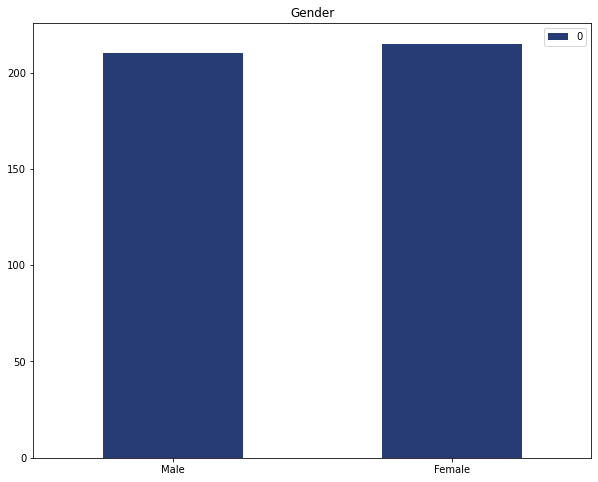

In [14]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"]).plot.bar(rot=0 ,title="Gender", figsize=(10, 8) , color=["#273c75"]);

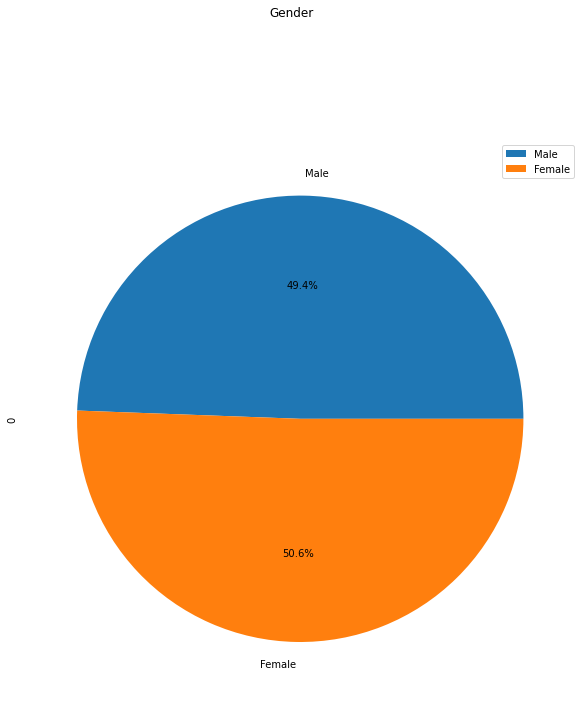

In [15]:
pd.DataFrame( [
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['male'])]),
            len(twitterCorpus_df[twitterCorpus_df.gender.isin(['female'])])
    ], index=["Male", "Female"]).plot.pie(subplots=True, figsize=(10, 12), autopct='%1.1f%%', title="Gender");

# <font color="green"> Pre-process on all data <font>

## <font color="blue"> Remove Punctuation and Stop Words </font>

In [16]:
pd.options.display.max_colwidth = 150
twitterCorpus_df

,text,gender
0,"@zulahni Oh, honey. Don&#39;t force us to stage an intervention. Look at your life. Look at your choices. #sassygayfriend\n@BrianEnigma Re: ARG To...",male
1,"@lukeniuk Tack män! Kul som fan att träffas!\nTack själv man, riktigt fett att få höra dig köra live! @MangeHellberg @Tigerboys @Imtherereasonwhy ...",male
2,"Report from SIGIR 2011 (Beijing, China) - http://post.ly/2lpEH - #amazonmechanicalturk #clustering #conferencereports #crowdsourcing #gir\nPeter ...",male
3,After quite some time working on different things: Running some experiments on content extraction from web documents again...\nmight be interesti...,male
4,Financial crisis hurting new job seekers in Japan http://www.yomiuri.co.jp/dy/business/20081111TDY04303.htm\nUS Students May Seek More Loans as Sa...,male
...,...,...
420,@pablomoreiras Exacto ;-) @eEAmerica\nLo q me encanta d #Google RT @Alyssa_Milano: Google Doodle Honors 50th Anniversary of &#39;I Have a Dream&#3...,female
421,"&quot;Chance is like a picture, it&#39;d be nice if you&#39;d just take it.&quot;\nI&#39;m at The Juice Press (New York)http://4sq.com/oc64P0&nbsp...",female
422,How to Recognize a Hipster - Your server has a full beard and is wearing a beanie. http://tumblr.com/xrn47n6ngy&nbsp;\nGloria Ferrera Blanc de Bla...,female
423,"@rigbysdeli thanks so much! Info sent\nA moto for work, pals and play. Doodle by @dineensparish http://instagram.com/p/afzwlgxT94/&nbsp;\nyou know...",female


## <center> <font color="blue"> Remove Punctuation </font> </center> 

In [17]:
#Remove Punctuation
twitterCorpus_df.text = twitterCorpus_df.text.str.replace('[^\w\s]','',regex=True)
twitterCorpus_df

,text,gender
0,zulahni Oh honey Don39t force us to stage an intervention Look at your life Look at your choices sassygayfriend\nBrianEnigma Re ARG Tools 21 bad n...,male
1,lukeniuk Tack män Kul som fan att träffas\nTack själv man riktigt fett att få höra dig köra live MangeHellberg Tigerboys Imtherereasonwhy realkaze...,male
2,Report from SIGIR 2011 Beijing China httppostly2lpEH amazonmechanicalturk clustering conferencereports crowdsourcing gir\nPeter Jackson A Pers...,male
3,After quite some time working on different things Running some experiments on content extraction from web documents again\nmight be interesting f...,male
4,Financial crisis hurting new job seekers in Japan httpwwwyomiuricojpdybusiness20081111TDY04303htm\nUS Students May Seek More Loans as Savings Dwin...,male
...,...,...
420,pablomoreiras Exacto eEAmerica\nLo q me encanta d Google RT Alyssa_Milano Google Doodle Honors 50th Anniversary of 39I Have a Dream39 httponmasht...,female
421,quotChance is like a picture it39d be nice if you39d just take itquot\nI39m at The Juice Press New Yorkhttp4sqcomoc64P0nbsp\nIt39s been a majorly ...,female
422,How to Recognize a Hipster Your server has a full beard and is wearing a beanie httptumblrcomxrn47n6ngynbsp\nGloria Ferrera Blanc de Blancs In t...,female
423,rigbysdeli thanks so much Info sent\nA moto for work pals and play Doodle by dineensparish httpinstagramcompafzwlgxT94nbsp\nyou know when you are ...,female


## <center> <font color="blue"> Remove stopWords </font> </center> 

In [18]:
# Remove stopWords
twitterCorpus_df.text = twitterCorpus_df.text.map( lambda x: remove_stopwords(x))
twitterCorpus_df

,text,gender
0,zulahni Oh honey Don39t force stage intervention Look life Look choices sassygayfriend BrianEnigma Re ARG Tools 21 bad news HTML entity actually q...,male
1,lukeniuk Tack män Kul som fan att träffas Tack själv man riktigt fett att få höra dig köra live MangeHellberg Tigerboys Imtherereasonwhy realkazey...,male
2,Report SIGIR 2011 Beijing China httppostly2lpEH amazonmechanicalturk clustering conferencereports crowdsourcing gir Peter Jackson A Personal Obitu...,male
3,After time working different things Running experiments content extraction web documents interesting arifah77 RT danielequercia RT LouWoodley How ...,male
4,Financial crisis hurting new job seekers Japan httpwwwyomiuricojpdybusiness20081111TDY04303htm US Students May Seek More Loans Savings Dwindle htt...,male
...,...,...
420,pablomoreiras Exacto eEAmerica Lo q encanta d Google RT Alyssa_Milano Google Doodle Honors 50th Anniversary 39I Have Dream39 httponmashto147ZjEHnb...,female
421,quotChance like picture it39d nice you39d itquot I39m The Juice Press New Yorkhttp4sqcomoc64P0nbsp It39s majorly productive day work thanks quotFo...,female
422,How Recognize Hipster Your server beard wearing beanie httptumblrcomxrn47n6ngynbsp Gloria Ferrera Blanc Blancs In glass Color Creamy orange citrus...,female
423,rigbysdeli thanks Info sent A moto work pals play Doodle dineensparish httpinstagramcompafzwlgxT94nbsp know having days think head actually fall M...,female


## <center> <font color="blue"> Define a function for cleane the data </font> </center> 

In [19]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def clean_text(text):
     #Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?://.*?\\s+', '', text, flags=re.MULTILINE)
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text=pattern.sub('', text)
    #re.sub(r'(\s)http\w+', r'\1',text )
    #Remove long words
    longword = re.compile(r'\W*\b\w{15,500}\b')
    text=longword.sub('', text)
    #Remove short words
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    text=shortword.sub('', text)
#remove emojis from text
    text = deEmojify(text)

    # lower capitalization
    text=text.lower()
    
    # Remove punctuation 
    remove = string.punctuation
    remove = remove.replace("@", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    text=re.sub(pattern, "", text) 
    
    #Remove username
    text=re.sub(r'@.*?(?=\s)', '', text)
    #Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    return text

## <center> <font color="blue"> Cleane data using user define function </font> </center> 

In [20]:
twitterCorpus_df.text = twitterCorpus_df.text.map( lambda x: clean_text(x))
twitterCorpus_df

,text,gender
0,zulahni honey dont force stage intervention look life look choices sassygayfriend brianenigma tools news html entity actually quotequot htmlisweir...,male
1,lukeniuk tack trffas tack sjlv riktigt fett hra kra live mangehellberg tigerboys realkazey mangehellberg fr tuff mitt eget bsta brs eller atelierg...,male
2,report sigir beijing china clustering crowdsourcing peter jackson personal obituary obituaries people facebook uses natural language processing t...,male
3,after time working different things running experiments content extraction documents interesting arifah danielequercia louwoodley people twitter p...,male
4,financial crisis hurting seekers japan students seek more loans savings dwindle programs world queueing this probably delicious article harvard pr...,male
...,...,...
420,pablomoreiras exacto eeamerica encanta google alyssamilano google doodle honors th anniversary have dream mashable nstlbcn greater progress desire...,female
421,quotchance like picture itd nice youd itquot im juice press its majorly productive work thanks quotfountain youthquot smoothie drank morning live ...,female
422,recognize hipster your server beard wearing beanie gloria ferrera blanc blancs glass color creamy orange citrus consistency smooth small cities l...,female
423,rigbysdeli thanks info sent moto work pals play doodle dineensparish know having days think head actually fall mine actually today breathe sertone...,female


In [21]:
twitterCorpus_df.shape

(425, 2)

#  <font color="Red" size=6> Step 3: Label Encoding for Train/Test Data </font>



In [22]:
pd.options.display.max_colwidth = 100
twitterCorpus_le_df = twitterCorpus_df.copy()
twitterCorpus_le_df

,text,gender
0,zulahni honey dont force stage intervention look life look choices sassygayfriend brianenigma to...,male
1,lukeniuk tack trffas tack sjlv riktigt fett hra kra live mangehellberg tigerboys realkazey mange...,male
2,report sigir beijing china clustering crowdsourcing peter jackson personal obituary obituaries ...,male
3,after time working different things running experiments content extraction documents interesting...,male
4,financial crisis hurting seekers japan students seek more loans savings dwindle programs world q...,male
...,...,...
420,pablomoreiras exacto eeamerica encanta google alyssamilano google doodle honors th anniversary h...,female
421,quotchance like picture itd nice youd itquot im juice press its majorly productive work thanks q...,female
422,recognize hipster your server beard wearing beanie gloria ferrera blanc blancs glass color crea...,female
423,rigbysdeli thanks info sent moto work pals play doodle dineensparish know having days think head...,female


In [23]:
leGender = LabelEncoder()

twitterCorpus_le_df['gender'] = leGender.fit_transform(twitterCorpus_le_df['gender'])
twitterCorpus_le_df

,text,gender
0,zulahni honey dont force stage intervention look life look choices sassygayfriend brianenigma to...,1
1,lukeniuk tack trffas tack sjlv riktigt fett hra kra live mangehellberg tigerboys realkazey mange...,1
2,report sigir beijing china clustering crowdsourcing peter jackson personal obituary obituaries ...,1
3,after time working different things running experiments content extraction documents interesting...,1
4,financial crisis hurting seekers japan students seek more loans savings dwindle programs world q...,1
...,...,...
420,pablomoreiras exacto eeamerica encanta google alyssamilano google doodle honors th anniversary h...,0
421,quotchance like picture itd nice youd itquot im juice press its majorly productive work thanks q...,0
422,recognize hipster your server beard wearing beanie gloria ferrera blanc blancs glass color crea...,0
423,rigbysdeli thanks info sent moto work pals play doodle dineensparish know having days think head...,0


#  <font color="Red" size=6> Step 4: Feature Extraction </font>

# <center> <font color="green" size=8> <i style=" color:#F0CD23"> N-gram Word Range (1 to 3) </i> </font> </center>

# <center> <font color="blue"> Word Uni-grams (N = 1) by CountVectorizer </font> </center> 

In [24]:
# vect = CountVectorizer(max_features=1000,ngram_range=(1, 3))

cv_word_n1 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(1, 1),
                             max_features=2000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_word_n1)


vectorFeature = {}
vectorFeature["Word_Uni-Grams_CountVectorizer"] = cv_word_n1.fit_transform(twitterCorpus_le_df['text']).todense()

#print(vect.get_feature_names())
#print(vectorFeature)
print("\nShape of this feature vactore: ", vectorFeature["Word_Uni-Grams_CountVectorizer"].shape)

feature = pd.DataFrame(vectorFeature["Word_Uni-Grams_CountVectorizer"], columns=cv_word_n1.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(max_features=2000, stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,able,absolutely,abstract,academic,accepted,access,according,account,accounts,action,...,yoleidy,york,youd,youll,young,youre,youth,youtube,youve,yummy
0,1,0,0,0,0,0,2,5,0,3,...,0,1,1,6,1,34,0,4,6,0
1,0,1,0,0,0,0,0,3,0,1,...,0,0,2,7,0,15,0,0,8,0
2,0,1,0,4,0,9,5,0,0,2,...,0,3,0,0,0,5,0,4,0,0
3,1,0,0,1,9,5,1,1,0,0,...,0,0,0,0,0,4,0,1,0,0
4,2,0,0,9,8,1,0,1,0,1,...,0,1,0,1,1,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,4,0,0,0,0,0,1,0,1,...,0,35,1,2,1,14,0,1,2,2
422,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,1,3,0,1,2,1,0,3,...,0,0,0,1,11,11,0,7,0,0


# <center> <font color="blue"> Word Uni-grams (N = 1) by TFIDFVectorizer </font> </center> 

In [25]:
tf_word_n1 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(1, 1),
                             max_features=2000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tf_word_n1)

vectorFeature["Word_Uni-Grams_TFIDFVectorizer"] = tf_word_n1.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["Word_Uni-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["Word_Uni-Grams_TFIDFVectorizer"], columns=tf_word_n1.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(max_features=2000, stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,able,absolutely,abstract,academic,accepted,access,according,account,accounts,action,...,yoleidy,york,youd,youll,young,youre,youth,youtube,youve,yummy
0,0.006588,0.000000,0.000000,0.000000,0.000000,0.000000,0.015141,0.032114,0.0,0.020022,...,0.0,0.006525,0.007966,0.037592,0.006061,0.168442,0.0,0.022744,0.036149,0.000000
1,0.000000,0.006996,0.000000,0.000000,0.000000,0.000000,0.000000,0.019141,0.0,0.006630,...,0.0,0.000000,0.015826,0.043569,0.000000,0.073823,0.0,0.000000,0.047881,0.000000
2,0.000000,0.003952,0.000000,0.023487,0.000000,0.035081,0.021240,0.000000,0.0,0.007490,...,0.0,0.010985,0.000000,0.000000,0.000000,0.013900,0.0,0.012763,0.000000,0.000000
3,0.003905,0.000000,0.000000,0.006203,0.053087,0.020589,0.004488,0.003807,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.011747,0.0,0.003371,0.000000,0.000000
4,0.010344,0.000000,0.000000,0.073933,0.062494,0.005453,0.000000,0.005042,0.0,0.005240,...,0.0,0.005123,0.000000,0.004919,0.004758,0.003889,0.0,0.013392,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.045694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
421,0.000000,0.027363,0.000000,0.000000,0.000000,0.000000,0.000000,0.006239,0.0,0.006483,...,0.0,0.221839,0.007737,0.012172,0.005887,0.067371,0.0,0.005523,0.011704,0.018369
422,0.000000,0.000000,0.000000,0.000000,0.000000,0.018199,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
423,0.000000,0.000000,0.009812,0.025818,0.000000,0.005713,0.012452,0.005282,0.0,0.016467,...,0.0,0.000000,0.000000,0.005153,0.054831,0.044820,0.0,0.032736,0.000000,0.000000


# <center> <font color="blue"> Word Bi-grams (N = 2) by CountVectorizer </font> </center> 

In [26]:
cv_word_n2 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(2, 2),
                             max_features=2000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_word_n2)

vectorFeature["Word_Bi-Grams_CountVectorizer"] = cv_word_n2.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["Word_Bi-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["Word_Bi-Grams_CountVectorizer"], columns=cv_word_n2.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(max_features=2000, ngram_range=(2, 2), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,abbe buck,abstract horse,academic english,account manager,adam markus,added video,admissions guru,adsquot brand,advertising marketing,advertising require,...,youre looking,youre right,youre welcome,youtube check,youtube eurobasket,youtube hidden,youtube playlist,youtube video,youve quoted,zeta interactive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,37,0,33,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,1,0,0,0,0,0,0,...,2,0,2,0,0,0,0,7,0,0


# <center> <font color="blue"> Word Bi-grams (N = 2) by TFIDFVectorizer </font> </center> 

In [27]:
tf_word_n2 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(2, 2),
                             max_features=2000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tf_word_n2)

vectorFeature["Word_Bi-Grams_TFIDFVectorizer"] = tf_word_n2.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["Word_Bi-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["Word_Bi-Grams_TFIDFVectorizer"], columns=tf_word_n2.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(max_features=2000, ngram_range=(2, 2), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,abbe buck,abstract horse,academic english,account manager,adam markus,added video,admissions guru,adsquot brand,advertising marketing,advertising require,...,youre looking,youre right,youre welcome,youtube check,youtube eurobasket,youtube hidden,youtube playlist,youtube video,youve quoted,zeta interactive
0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.067180,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.127576,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.026006,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.067028,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.50169,0.0,0.447453,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.006830,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
421,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.027012,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
422,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
423,0.0,0.0,0.0,0.063931,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.095019,0.000000,0.073675,0.0,0.0,0.0,0.0,0.280702,0.0,0.0


# <center> <font color="blue"> Word Tri-grams (N = 3) by CountVectorizer </font> </center> 

In [28]:
cv_word_n3 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(3, 3),
                             max_features=2000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_word_n3)

vectorFeature["Word_Tri-Grams_CountVectorizer"] = cv_word_n3.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["Word_Tri-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["Word_Tri-Grams_CountVectorizer"], columns=cv_word_n3.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(max_features=2000, ngram_range=(3, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,abduzeedo design inspiration,ability breaks courage,able endure elbert,abstract horse paintings,abuse victims reclaim,academic english solutions,acadmicos rpido retorno,accademici costi contenuti,access basketball practice,account manager ringwood,...,youtube check hidden,youtube check just,youtube eurobasket slovenia,youtube hidden secret,youtube playlist beatles,youtube playlist north,youtube playlist sony,youtube video sexy,youve quoted storify,zimmpoll asked question
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <center> <font color="blue"> Word Tri-grams (N = 3) by TFIDFVectorizer </font> </center> 

In [29]:
tf_word_n3 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='word',
                             token_pattern=r'\w{1,}',
                             stop_words='english',
                             ngram_range=(2, 2),
                             max_features=2000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tf_word_n3)

vectorFeature["Word_Tri-Grams_TFIDFVectorizer"] = tf_word_n3.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["Word_Tri-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["Word_Tri-Grams_TFIDFVectorizer"], columns=tf_word_n3.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(max_features=2000, ngram_range=(2, 2), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

Shape of this feature vactore:  (425, 2000)


,abbe buck,abstract horse,academic english,account manager,adam markus,added video,admissions guru,adsquot brand,advertising marketing,advertising require,...,youre looking,youre right,youre welcome,youtube check,youtube eurobasket,youtube hidden,youtube playlist,youtube video,youve quoted,zeta interactive
0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.067180,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.127576,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.026006,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.067028,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.50169,0.0,0.447453,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.006830,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
421,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.027012,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
422,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
423,0.0,0.0,0.0,0.063931,0.00000,0.0,0.000000,0.0,0.0,0.0,...,0.095019,0.000000,0.073675,0.0,0.0,0.0,0.0,0.280702,0.0,0.0


# <center> <font color="green" size=8> <i style=" color:#F0CD23"> N-gram Character Range (3 to 10) </i> </font> </center>

# <center> <font color="blue"> Character 3-Gram By CountVectorizer </font> </center> 

In [30]:
cv_char_n3 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,3),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n3)

vectorFeature["char_3-Grams_CountVectorizer"] = cv_char_n3.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_3-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_3-Grams_CountVectorizer"], columns=cv_char_n3.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 3),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,a,aa,ab,ac,ad,ae,af,ag,...,zza,zze,zzf,zzi,zzl,zzm,zzo,zzu,zzy,zzz
0,6597,297,0,1,5,43,12,0,7,9,...,7,0,0,0,31,0,0,0,0,0
1,7010,406,0,0,2,16,19,0,15,3,...,0,0,0,0,2,0,0,0,0,0
2,7429,439,0,10,9,52,24,1,5,11,...,0,0,0,0,1,0,0,0,0,0
3,5393,275,0,1,10,37,10,0,6,5,...,0,0,0,0,0,0,1,0,0,0
4,5006,496,0,1,8,39,217,0,5,1,...,0,0,0,1,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1181,96,0,2,14,2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,5670,241,0,0,14,11,8,0,6,2,...,1,0,1,0,0,0,0,0,0,0
422,2424,94,0,2,0,6,4,0,0,0,...,0,0,0,2,0,0,0,0,0,0
423,7510,338,0,2,7,38,19,6,12,3,...,3,1,0,1,2,0,0,0,1,0


# <center> <font color="blue"> Character 3-Gram By TFIDFVectorizer </font> </center> 

In [31]:
tv_char_n3 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,3),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n3)

vectorFeature["char_3-Grams_TFIDFVectorizer"] = tv_char_n3.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_3-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_3-Grams_TFIDFVectorizer"], columns=tv_char_n3.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 3),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,a,aa,ab,ac,ad,ae,af,ag,...,zza,zze,zzf,zzi,zzl,zzm,zzo,zzu,zzy,zzz
0,0.503775,0.022680,0.0,0.000154,0.000442,0.003642,0.001021,0.000000,0.000681,0.000852,...,0.001082,0.000000,0.0000,0.000000,0.005920,0.0,0.000000,0.0,0.000000,0.000000
1,0.502762,0.029119,0.0,0.000000,0.000166,0.001273,0.001518,0.000000,0.001370,0.000267,...,0.000000,0.000000,0.0000,0.000000,0.000359,0.0,0.000000,0.0,0.000000,0.000000
2,0.447625,0.026451,0.0,0.001212,0.000628,0.003475,0.001611,0.000144,0.000384,0.000822,...,0.000000,0.000000,0.0000,0.000000,0.000151,0.0,0.000000,0.0,0.000000,0.000000
3,0.471030,0.024019,0.0,0.000176,0.001011,0.003584,0.000973,0.000000,0.000667,0.000542,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000311,0.0,0.000000,0.000000
4,0.477912,0.047352,0.0,0.000192,0.000884,0.004129,0.023084,0.000000,0.000608,0.000118,...,0.000000,0.000000,0.0000,0.000293,0.000000,0.0,0.000000,0.0,0.000000,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.441888,0.035920,0.0,0.001505,0.006062,0.000830,0.002502,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
421,0.504582,0.021447,0.0,0.000000,0.001442,0.001086,0.000793,0.000000,0.000680,0.000221,...,0.000180,0.000000,0.0003,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
422,0.522075,0.020245,0.0,0.000866,0.000000,0.001433,0.000960,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.001320,0.000000,0.0,0.000000,0.0,0.000000,0.000000
423,0.488944,0.022006,0.0,0.000262,0.000527,0.002744,0.001378,0.000930,0.000995,0.000242,...,0.000395,0.000221,0.0000,0.000200,0.000326,0.0,0.000000,0.0,0.000194,0.000000


# <center> <font color="blue"> Character 4-Gram By CountVectorizer </font> </center> 

In [32]:
cv_char_n4 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,4),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n4)

vectorFeature["char_4-Grams_CountVectorizer"] = cv_char_n4.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_4-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_4-Grams_CountVectorizer"], columns=cv_char_n4.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 4),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,abs,ac,aca,acc,act,ad,...,zin,zine,zing,zo,zon,zon,zu,zy,zy,zz
0,6597,297,5,4,0,43,0,9,25,12,...,6,0,6,8,3,1,13,9,9,38
1,7010,406,2,0,2,16,0,3,13,19,...,2,0,1,5,4,2,0,5,5,2
2,7429,439,9,2,2,52,11,20,6,24,...,11,0,11,10,10,8,5,1,0,3
3,5393,275,10,6,1,37,2,21,14,10,...,5,0,5,8,3,3,1,0,0,1
4,5006,496,8,4,0,39,15,17,5,217,...,3,0,3,2,2,1,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1181,96,14,0,0,2,0,0,2,6,...,2,0,2,12,0,0,0,0,0,2
421,5670,241,14,3,4,11,0,4,5,8,...,22,4,18,4,0,0,1,6,6,6
422,2424,94,0,0,0,6,0,4,0,4,...,10,0,10,0,0,0,0,0,0,2
423,7510,338,7,2,3,38,4,11,19,19,...,40,1,39,6,4,3,0,1,1,11



# <center> <font color="blue"> Character 4-Gram By TFIDFVectorizer </font> </center> 

In [33]:
tv_char_n4 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,4),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n4)

vectorFeature["char_4-Grams_TFIDFVectorizer"] = tv_char_n4.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_4-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_4-Grams_TFIDFVectorizer"], columns=tv_char_n4.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 4),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,abs,ac,aca,acc,act,ad,...,zin,zine,zing,zo,zon,zon,zu,zy,zy,zz
0,0.502543,0.022625,0.000441,0.000478,0.000000,0.003633,0.000000,0.000865,0.002420,0.001019,...,0.000567,0.000000,0.000622,0.000780,0.000347,0.000139,0.001838,0.001088,0.001142,0.004172
1,0.506102,0.029312,0.000167,0.000000,0.000241,0.001281,0.000000,0.000273,0.001193,0.001528,...,0.000179,0.000000,0.000098,0.000462,0.000438,0.000263,0.000000,0.000573,0.000601,0.000208
2,0.445640,0.026334,0.000625,0.000188,0.000200,0.003459,0.001474,0.001513,0.000457,0.001604,...,0.000818,0.000000,0.000898,0.000768,0.000910,0.000875,0.000557,0.000095,0.000000,0.000259
3,0.470172,0.023975,0.001009,0.000821,0.000146,0.003577,0.000390,0.002309,0.001551,0.000971,...,0.000541,0.000000,0.000593,0.000893,0.000397,0.000477,0.000162,0.000000,0.000000,0.000126
4,0.475641,0.047127,0.000880,0.000597,0.000000,0.004110,0.003184,0.002038,0.000604,0.022974,...,0.000354,0.000000,0.000388,0.000243,0.000288,0.000173,0.000000,0.000000,0.000000,0.001096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.438883,0.035676,0.006021,0.000000,0.000000,0.000824,0.000000,0.000000,0.000944,0.002485,...,0.000922,0.000000,0.001011,0.005708,0.000000,0.000000,0.000000,0.000000,0.000000,0.001071
421,0.503116,0.021385,0.001438,0.000418,0.000593,0.001082,0.000000,0.000448,0.000564,0.000791,...,0.002421,0.000667,0.002173,0.000454,0.000000,0.000000,0.000165,0.000845,0.000887,0.000767
422,0.520335,0.020178,0.000000,0.000000,0.000000,0.001428,0.000000,0.001083,0.000000,0.000957,...,0.002662,0.000000,0.002921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000619
423,0.487848,0.021956,0.000526,0.000204,0.000325,0.002738,0.000581,0.000901,0.001568,0.001375,...,0.003223,0.000122,0.003447,0.000499,0.000394,0.000355,0.000000,0.000103,0.000108,0.001030


# <center> <font color="blue"> Character 5-Gram By CountVectorizer </font> </center> 

In [34]:
cv_char_n5 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,5),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n5)

vectorFeature["char_5-Grams_CountVectorizer"] = cv_char_n5.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_5-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_5-Grams_CountVectorizer"], columns=cv_char_n5.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 5),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,abou,ac,acc,acce,acco,act,...,ze,zi,zin,zing,zing,zo,zon,zy,zy,zz
0,6597,297,5,4,3,43,9,1,7,25,...,5,13,6,6,6,8,3,9,9,38
1,7010,406,2,0,0,16,3,0,3,13,...,2,23,2,1,1,5,4,5,5,2
2,7429,439,9,2,2,52,20,11,5,6,...,12,11,11,11,11,10,10,1,0,3
3,5393,275,10,6,6,37,21,17,2,14,...,3,11,5,5,5,8,3,0,0,1
4,5006,496,8,4,3,39,17,13,1,5,...,10,4,3,3,3,2,2,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1181,96,14,0,0,2,0,0,0,2,...,0,2,2,2,2,12,0,0,0,2
421,5670,241,14,3,3,11,4,2,1,5,...,5,23,22,18,18,4,0,6,6,6
422,2424,94,0,0,0,6,4,2,0,0,...,4,10,10,10,10,0,0,0,0,2
423,7510,338,7,2,2,38,11,3,7,19,...,23,43,40,39,38,6,4,1,1,11


# <center> <font color="blue"> Character 5-Gram By TFIDFVectorizer </font> </center> 

In [35]:
tv_char_n5 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,5),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n5)

vectorFeature["char_5-Grams_TFIDFVectorizer"] = tv_char_n5.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_5-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_5-Grams_TFIDFVectorizer"], columns=tv_char_n5.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 5),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,abou,ac,acc,acce,acco,act,...,ze,zi,zin,zing,zing,zo,zon,zy,zy,zz
0,0.502168,0.022608,0.000440,0.000478,0.000380,0.003630,0.000864,0.000113,0.000802,0.002418,...,0.000503,0.001148,0.000566,0.000621,0.000625,0.000779,0.000346,0.001087,0.001141,0.004169
1,0.506175,0.029316,0.000167,0.000000,0.000000,0.001281,0.000273,0.000000,0.000326,0.001193,...,0.000191,0.001927,0.000179,0.000098,0.000099,0.000462,0.000438,0.000573,0.000601,0.000208
2,0.444851,0.026287,0.000624,0.000188,0.000199,0.003453,0.001511,0.000974,0.000451,0.000457,...,0.000949,0.000764,0.000817,0.000896,0.000901,0.000766,0.000908,0.000095,0.000000,0.000259
3,0.469426,0.023937,0.001007,0.000820,0.000870,0.003572,0.002306,0.002188,0.000262,0.001548,...,0.000345,0.001111,0.000540,0.000592,0.000595,0.000891,0.000396,0.000000,0.000000,0.000125
4,0.475030,0.047066,0.000879,0.000596,0.000474,0.004104,0.002035,0.001824,0.000143,0.000603,...,0.001254,0.000440,0.000353,0.000387,0.000389,0.000243,0.000288,0.000000,0.000000,0.001094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.439890,0.035757,0.006035,0.000000,0.000000,0.000826,0.000000,0.000000,0.000000,0.000947,...,0.000000,0.000864,0.000924,0.001014,0.001019,0.005721,0.000000,0.000000,0.000000,0.001074
421,0.502810,0.021372,0.001437,0.000418,0.000443,0.001082,0.000447,0.000262,0.000133,0.000563,...,0.000586,0.002366,0.002420,0.002172,0.002183,0.000454,0.000000,0.000844,0.000886,0.000767
422,0.519517,0.020146,0.000000,0.000000,0.000000,0.001426,0.001081,0.000634,0.000000,0.000000,...,0.001133,0.002486,0.002658,0.002916,0.002931,0.000000,0.000000,0.000000,0.000000,0.000618
423,0.487412,0.021937,0.000526,0.000204,0.000216,0.002735,0.000901,0.000288,0.000684,0.001567,...,0.001972,0.003237,0.003220,0.003444,0.003373,0.000498,0.000394,0.000103,0.000108,0.001029


# <center> <font color="blue"> Character 6-Gram By CountVectorizer </font> </center> 

In [36]:
cv_char_n6 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,6),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n6)

vectorFeature["char_6-Grams_CountVectorizer"] = cv_char_n6.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_6-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_6-Grams_CountVectorizer"], columns=cv_char_n6.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 6),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,ac,acc,acce,acco,act,acti,...,ze,ze,zi,zin,zing,zing,zo,zon,zy,zz
0,6597,297,5,4,43,9,1,7,25,5,...,15,5,13,6,6,6,8,3,9,38
1,7010,406,2,0,16,3,0,3,13,2,...,11,2,23,2,1,1,5,4,5,2
2,7429,439,9,2,52,20,11,5,6,6,...,32,12,11,11,11,11,10,10,1,3
3,5393,275,10,6,37,21,17,2,14,9,...,14,3,11,5,5,5,8,3,0,1
4,5006,496,8,4,39,17,13,1,5,2,...,29,10,4,3,3,3,2,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1181,96,14,0,2,0,0,0,2,2,...,4,0,2,2,2,2,12,0,0,2
421,5670,241,14,3,11,4,2,1,5,2,...,17,5,23,22,18,18,4,0,6,6
422,2424,94,0,0,6,4,2,0,0,0,...,10,4,10,10,10,10,0,0,0,2
423,7510,338,7,2,38,11,3,7,19,4,...,36,23,43,40,39,38,6,4,1,11


# <center> <font color="blue"> Character 6-Gram By TFIDFVectorizer </font> </center> 

In [37]:
tv_char_n6 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(1,6),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n6)

vectorFeature["char_6-Grams_TFIDFVectorizer"] = tv_char_n6.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_6-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_6-Grams_TFIDFVectorizer"], columns=tv_char_n6.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(1, 6),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,,a,ab,abo,ac,acc,acce,acco,act,acti,...,ze,ze,zi,zin,zing,zing,zo,zon,zy,zz
0,0.502082,0.022604,0.000440,0.000478,0.003629,0.000864,0.000113,0.000802,0.002418,0.000547,...,0.001340,0.000503,0.001148,0.000566,0.000621,0.000624,0.000779,0.000346,0.001087,0.004168
1,0.506183,0.029317,0.000167,0.000000,0.001281,0.000273,0.000000,0.000326,0.001193,0.000208,...,0.000932,0.000191,0.001927,0.000179,0.000098,0.000099,0.000462,0.000438,0.000573,0.000208
2,0.444449,0.026264,0.000623,0.000188,0.003450,0.001509,0.000973,0.000450,0.000456,0.000516,...,0.002247,0.000948,0.000763,0.000816,0.000895,0.000900,0.000766,0.000908,0.000095,0.000259
3,0.469064,0.023919,0.001007,0.000819,0.003569,0.002304,0.002186,0.000262,0.001547,0.001125,...,0.001429,0.000345,0.001110,0.000539,0.000592,0.000595,0.000891,0.000396,0.000000,0.000125
4,0.474708,0.047035,0.000878,0.000595,0.004101,0.002034,0.001823,0.000143,0.000602,0.000273,...,0.003228,0.001253,0.000440,0.000353,0.000387,0.000389,0.000243,0.000288,0.000000,0.001093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.439882,0.035757,0.006035,0.000000,0.000826,0.000000,0.000000,0.000000,0.000947,0.001071,...,0.001749,0.000000,0.000864,0.000924,0.001014,0.001019,0.005721,0.000000,0.000000,0.001074
421,0.502731,0.021368,0.001437,0.000418,0.001082,0.000447,0.000262,0.000133,0.000563,0.000255,...,0.001769,0.000586,0.002366,0.002419,0.002172,0.002182,0.000454,0.000000,0.000844,0.000767
422,0.519341,0.020139,0.000000,0.000000,0.001426,0.001081,0.000634,0.000000,0.000000,0.000000,...,0.002515,0.001132,0.002485,0.002657,0.002915,0.002930,0.000000,0.000000,0.000000,0.000618
423,0.487233,0.021929,0.000526,0.000204,0.002734,0.000900,0.000288,0.000684,0.001566,0.000373,...,0.002742,0.001971,0.003236,0.003219,0.003443,0.003371,0.000498,0.000394,0.000103,0.001029


# <center> <font color="blue"> Character 7-Gram By CountVectorizer </font> </center> 

In [38]:
cv_char_n7 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,7),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n7)

vectorFeature["char_7-Grams_CountVectorizer"] = cv_char_n7.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_7-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_7-Grams_CountVectorizer"], columns=cv_char_n7.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 7),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ysi,yst,yste,yti,za,ze,zin,zing,zing,zon
0,5,4,43,9,1,7,25,5,16,16,...,1,3,3,1,7,5,6,6,6,3
1,2,0,16,3,0,3,13,2,11,11,...,2,5,2,1,0,2,2,1,1,4
2,9,2,52,20,11,5,6,6,0,0,...,30,13,11,46,0,12,11,11,11,10
3,10,6,37,21,17,2,14,9,3,3,...,28,24,18,1,0,3,5,5,5,3
4,8,4,39,17,13,1,5,2,3,3,...,5,3,3,6,0,10,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,14,0,2,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,2,2,0
421,14,3,11,4,2,1,5,2,3,3,...,5,1,1,4,2,5,22,18,18,0
422,0,0,6,4,2,0,0,0,0,0,...,0,2,0,0,0,4,10,10,10,0
423,7,2,38,11,3,7,19,4,10,10,...,2,0,0,2,3,23,40,39,38,4


# <center> <font color="blue"> Character 7-Gram By TFIDFVectorizer </font> </center> 

In [39]:
tv_char_n7 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,7),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n7)

vectorFeature["char_7-Grams_TFIDFVectorizer"] = tv_char_n7.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_7-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_7-Grams_TFIDFVectorizer"], columns=tv_char_n7.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 7),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ysi,yst,yste,yti,za,ze,zin,zing,zing,zon
0,0.002710,0.002941,0.022335,0.005317,0.000692,0.004935,0.014877,0.003367,0.011856,0.011856,...,0.000791,0.001975,0.002290,0.000822,0.005215,0.003094,0.003485,0.003824,0.003843,0.002132
1,0.001122,0.000000,0.008598,0.001834,0.000000,0.002188,0.008004,0.001393,0.008433,0.008433,...,0.001636,0.003405,0.001579,0.000851,0.000000,0.001280,0.001202,0.000659,0.000663,0.002941
2,0.003244,0.000978,0.017963,0.007858,0.005066,0.002344,0.002375,0.002687,0.000000,0.000000,...,0.015778,0.005691,0.005583,0.025162,0.000000,0.004938,0.004250,0.004662,0.004685,0.004725
3,0.005291,0.004306,0.018760,0.012111,0.011491,0.001376,0.008133,0.005916,0.002170,0.002170,...,0.021614,0.015421,0.013410,0.000803,0.000000,0.001812,0.002835,0.003110,0.003126,0.002081
4,0.004475,0.003035,0.020906,0.010365,0.009290,0.000728,0.003071,0.001390,0.002294,0.002294,...,0.004081,0.002038,0.002363,0.005093,0.000000,0.006385,0.001798,0.001973,0.001983,0.001467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029224,0.000000,0.004001,0.000000,0.000000,0.000000,0.004584,0.005186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004474,0.004909,0.004933,0.000000
421,0.008655,0.002515,0.006517,0.002695,0.001580,0.000804,0.003394,0.001536,0.002535,0.002535,...,0.004510,0.000751,0.000870,0.003752,0.001699,0.003529,0.014576,0.013084,0.013149,0.000000
422,0.000000,0.000000,0.007692,0.005833,0.003418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003250,0.000000,0.000000,0.000000,0.006109,0.014338,0.015730,0.015808,0.000000
423,0.003088,0.001197,0.016063,0.005289,0.001691,0.004016,0.009202,0.002192,0.006030,0.006030,...,0.001287,0.000000,0.000000,0.001339,0.001819,0.011581,0.018910,0.020227,0.019806,0.002313


# <center> <font color="blue"> Character 8-Gram By CountVectorizer </font> </center> 

In [40]:
cv_char_n8 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,8),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n8)

vectorFeature["char_8-Grams_CountVectorizer"] = cv_char_n8.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_8-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_8-Grams_CountVectorizer"], columns=cv_char_n8.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 8),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ys s,yst,yste,yti,za,ze,zin,zing,zing,zon
0,5,4,43,9,1,7,25,5,16,16,...,4,3,3,1,7,5,6,6,6,3
1,2,0,16,3,0,3,13,2,11,11,...,2,5,2,1,0,2,2,1,1,4
2,9,2,52,20,11,5,6,6,0,0,...,2,13,11,46,0,12,11,11,11,10
3,10,6,37,21,17,2,14,9,3,3,...,1,24,18,1,0,3,5,5,5,3
4,8,4,39,17,13,1,5,2,3,3,...,4,3,3,6,0,10,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,14,0,2,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,2,2,0
421,14,3,11,4,2,1,5,2,3,3,...,3,1,1,4,2,5,22,18,18,0
422,0,0,6,4,2,0,0,0,0,0,...,0,2,0,0,0,4,10,10,10,0
423,7,2,38,11,3,7,19,4,10,10,...,4,0,0,2,3,23,40,39,38,4


# <center> <font color="blue"> Character 8-Gram By TFIDFVectorizer </font> </center> 

In [41]:
tv_char_n8 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,8),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n8)

vectorFeature["char_8-Grams_TFIDFVectorizer"] = tv_char_n8.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_8-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_8-Grams_TFIDFVectorizer"], columns=tv_char_n8.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 8),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ys s,yst,yste,yti,za,ze,zin,zing,zing,zon
0,0.002709,0.002940,0.022327,0.005315,0.000692,0.004933,0.014872,0.003365,0.011852,0.011852,...,0.002790,0.001974,0.002289,0.000822,0.005213,0.003093,0.003484,0.003822,0.003841,0.002131
1,0.001122,0.000000,0.008600,0.001834,0.000000,0.002189,0.008006,0.001394,0.008435,0.008435,...,0.001444,0.003406,0.001580,0.000851,0.000000,0.001281,0.001202,0.000659,0.000663,0.002941
2,0.003229,0.000973,0.017879,0.007822,0.005042,0.002334,0.002364,0.002674,0.000000,0.000000,...,0.000924,0.005665,0.005557,0.025045,0.000000,0.004915,0.004230,0.004640,0.004663,0.004703
3,0.005262,0.004282,0.018658,0.012045,0.011428,0.001369,0.008088,0.005883,0.002158,0.002158,...,0.000677,0.015337,0.013337,0.000799,0.000000,0.001802,0.002820,0.003094,0.003109,0.002069
4,0.004449,0.003017,0.020784,0.010305,0.009236,0.000723,0.003053,0.001382,0.002281,0.002281,...,0.002864,0.002026,0.002349,0.005063,0.000000,0.006348,0.001788,0.001962,0.001971,0.001458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029194,0.000000,0.003997,0.000000,0.000000,0.000000,0.004579,0.005181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004470,0.004904,0.004928,0.000000
421,0.008651,0.002514,0.006514,0.002694,0.001579,0.000804,0.003392,0.001535,0.002534,0.002534,...,0.002387,0.000750,0.000870,0.003751,0.001699,0.003527,0.014569,0.013077,0.013142,0.000000
422,0.000000,0.000000,0.007696,0.005835,0.003420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003251,0.000000,0.000000,0.000000,0.006111,0.014344,0.015737,0.015815,0.000000
423,0.003084,0.001195,0.016044,0.005283,0.001689,0.004012,0.009191,0.002189,0.006024,0.006024,...,0.002269,0.000000,0.000000,0.001337,0.001817,0.011568,0.018888,0.020204,0.019783,0.002310


# <center> <font color="blue"> Character 9-Gram By CountVectorizer </font> </center> 

In [42]:
cv_char_n9 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,9),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n9)

vectorFeature["char_9-Grams_CountVectorizer"] = cv_char_n9.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_9-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_9-Grams_CountVectorizer"], columns=cv_char_n9.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 9),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ys,ys s,yst,yti,za,ze,zin,zing,zing,zon
0,5,4,43,9,1,7,25,5,16,16,...,50,4,3,1,7,5,6,6,6,3
1,2,0,16,3,0,3,13,2,11,11,...,31,2,5,1,0,2,2,1,1,4
2,9,2,52,20,11,5,6,6,0,0,...,20,2,13,46,0,12,11,11,11,10
3,10,6,37,21,17,2,14,9,3,3,...,15,1,24,1,0,3,5,5,5,3
4,8,4,39,17,13,1,5,2,3,3,...,26,4,3,6,0,10,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,14,0,2,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,2,2,0
421,14,3,11,4,2,1,5,2,3,3,...,39,3,1,4,2,5,22,18,18,0
422,0,0,6,4,2,0,0,0,0,0,...,16,0,2,0,0,4,10,10,10,0
423,7,2,38,11,3,7,19,4,10,10,...,30,4,0,2,3,23,40,39,38,4


# <center> <font color="blue"> Character 9-Gram By TFIDFVectorizer </font> </center> 

In [43]:
tv_char_n9 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,9),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n9)

vectorFeature["char_9-Grams_TFIDFVectorizer"] = tv_char_n9.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_9-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_9-Grams_TFIDFVectorizer"], columns=tv_char_n9.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 9),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ys,ys s,yst,yti,za,ze,zin,zing,zing,zon
0,0.002711,0.002942,0.022346,0.005320,0.000693,0.004938,0.014885,0.003368,0.011862,0.011862,...,0.026168,0.002793,0.001976,0.000823,0.005217,0.003095,0.003487,0.003826,0.003845,0.002133
1,0.001127,0.000000,0.008639,0.001842,0.000000,0.002199,0.008042,0.001400,0.008473,0.008473,...,0.016856,0.001451,0.003421,0.000855,0.000000,0.001286,0.001208,0.000662,0.000666,0.002954
2,0.003224,0.000972,0.017848,0.007808,0.005033,0.002330,0.002360,0.002670,0.000000,0.000000,...,0.006914,0.000922,0.005655,0.025002,0.000000,0.004907,0.004223,0.004632,0.004655,0.004695
3,0.005249,0.004271,0.018610,0.012014,0.011399,0.001365,0.008068,0.005868,0.002153,0.002153,...,0.007598,0.000676,0.015298,0.000796,0.000000,0.001798,0.002813,0.003086,0.003101,0.002064
4,0.004443,0.003013,0.020758,0.010292,0.009225,0.000722,0.003049,0.001380,0.002278,0.002278,...,0.013937,0.002860,0.002024,0.005057,0.000000,0.006340,0.001786,0.001959,0.001969,0.001456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029160,0.000000,0.003992,0.000000,0.000000,0.000000,0.004574,0.005175,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004465,0.004898,0.004922,0.000000
421,0.008649,0.002514,0.006512,0.002693,0.001578,0.000804,0.003391,0.001535,0.002534,0.002534,...,0.023252,0.002386,0.000750,0.003750,0.001698,0.003526,0.014566,0.013074,0.013139,0.000000
422,0.000000,0.000000,0.007705,0.005842,0.003424,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020692,0.000000,0.003255,0.000000,0.000000,0.006119,0.014361,0.015755,0.015834,0.000000
423,0.003084,0.001195,0.016043,0.005282,0.001688,0.004011,0.009190,0.002189,0.006023,0.006023,...,0.012755,0.002269,0.000000,0.001337,0.001817,0.011567,0.018886,0.020201,0.019781,0.002310


# <center> <font color="blue"> Character 10-Gram By CountVectorizer </font> </center> 

In [44]:
cv_char_n10 = CountVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,10),
                             max_features=8000
                            )


print("Parameters of CountVectorizer and its values:")  
print("\t\t",cv_char_n10)

vectorFeature["char_10-Grams_CountVectorizer"] = cv_char_n10.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_10-Grams_CountVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_10-Grams_CountVectorizer"], columns=cv_char_n10.get_feature_names())
feature

Parameters of CountVectorizer and its values:
		 CountVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 10),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ype,ys,ys s,yst,yti,ze,zin,zing,zing,zon
0,5,4,43,9,1,7,25,5,16,16,...,2,50,4,3,1,5,6,6,6,3
1,2,0,16,3,0,3,13,2,11,11,...,22,31,2,5,1,2,2,1,1,4
2,9,2,52,20,11,5,6,6,0,0,...,6,20,2,13,46,12,11,11,11,10
3,10,6,37,21,17,2,14,9,3,3,...,5,15,1,24,1,3,5,5,5,3
4,8,4,39,17,13,1,5,2,3,3,...,2,26,4,3,6,10,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,14,0,2,0,0,0,2,2,0,0,...,0,0,0,0,0,0,2,2,2,0
421,14,3,11,4,2,1,5,2,3,3,...,2,39,3,1,4,5,22,18,18,0
422,0,0,6,4,2,0,0,0,0,0,...,2,16,0,2,0,4,10,10,10,0
423,7,2,38,11,3,7,19,4,10,10,...,3,30,4,0,2,23,40,39,38,4


# <center> <font color="blue"> Character 10-Gram By TFIDFVectorizer </font> </center> 

In [45]:
tv_char_n10 = TfidfVectorizer(
                             strip_accents='unicode',
                             analyzer='char',
                             token_pattern=r'\c{1,}',
                             stop_words='english',
                             ngram_range=(3,10),
                             max_features=8000
                            )


print("Parameters of TfidfVectorizer and its values:")  
print("\t\t",tv_char_n10)

vectorFeature["char_10-Grams_TFIDFVectorizer"] = tv_char_n10.fit_transform(twitterCorpus_le_df['text']).todense()
print("\nShape of this feature vactore: ", vectorFeature["char_10-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_10-Grams_TFIDFVectorizer"], columns=tv_char_n10.get_feature_names())
feature

Parameters of TfidfVectorizer and its values:
		 TfidfVectorizer(analyzer='char', max_features=8000, ngram_range=(3, 10),
                stop_words='english', strip_accents='unicode',
                token_pattern='\\c{1,}')

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ype,ys,ys s,yst,yti,ze,zin,zing,zing,zon
0,0.002714,0.002945,0.022366,0.005325,0.000693,0.004942,0.014898,0.003371,0.011873,0.011873,...,0.001434,0.026192,0.002795,0.001978,0.000824,0.003098,0.003490,0.003829,0.003848,0.002135
1,0.001127,0.000000,0.008642,0.001843,0.000000,0.002199,0.008045,0.001400,0.008476,0.008476,...,0.016382,0.016863,0.001451,0.003422,0.000855,0.001287,0.001208,0.000663,0.000666,0.002955
2,0.003221,0.000971,0.017836,0.007803,0.005030,0.002328,0.002358,0.002668,0.000000,0.000000,...,0.002837,0.006909,0.000922,0.005651,0.024985,0.004903,0.004220,0.004629,0.004652,0.004692
3,0.005239,0.004264,0.018577,0.011993,0.011379,0.001363,0.008053,0.005858,0.002149,0.002149,...,0.003461,0.007585,0.000675,0.015271,0.000795,0.001794,0.002808,0.003080,0.003095,0.002060
4,0.004451,0.003019,0.020794,0.010310,0.009240,0.000724,0.003054,0.001382,0.002282,0.002282,...,0.001470,0.013961,0.002865,0.002027,0.005066,0.006351,0.001789,0.001963,0.001972,0.001459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029170,0.000000,0.003993,0.000000,0.000000,0.000000,0.004575,0.005177,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004466,0.004900,0.004924,0.000000
421,0.008644,0.002512,0.006509,0.002692,0.001578,0.000803,0.003389,0.001534,0.002532,0.002532,...,0.001631,0.023240,0.002385,0.000750,0.003748,0.003524,0.014558,0.013067,0.013132,0.000000
422,0.000000,0.000000,0.007711,0.005847,0.003427,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003544,0.020709,0.000000,0.003257,0.000000,0.006124,0.014373,0.015769,0.015847,0.000000
423,0.003084,0.001195,0.016041,0.005282,0.001688,0.004011,0.009189,0.002189,0.006022,0.006022,...,0.001746,0.012754,0.002268,0.000000,0.001337,0.011566,0.018884,0.020199,0.019779,0.002310


#  <font color="Red" size=6> Step 5 and 6: Train ML Algorithms and Evaluate ML Algorithms </font>

## <center> <font color="blue"> Create a DataFrame to store all models Pridiction by all feature vactor </font> </center> 

In [46]:
prediction = pd.DataFrame(columns=['Model Name', 'N-Gram Range', 'Accuracy', 'Error'])
prediction

,Model Name,N-Gram Range,Accuracy,Error


### <center> <font color="blue"> Split train and test data and Train 6 different ML Algorithms and store their prediction in a dataframe </font> </center>

In [47]:
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    

for n_gram in vectorFeature:
    trainData_input, testData_input, trainData_output, testData_output = train_test_split(
                                                                                        vectorFeature[n_gram],
                                                                                        twitterCorpus_le_df['gender'],
                                                                                        test_size=0.33,
                                                                                        random_state=42
                                                                                        )
    
    print('\n\n\n\n\n')
    printmd('<b>Split "{0}" Feature Vector input and gender label into train and test data:</b>'.format(n_gram), color="red")
    print('\n')
    printmd('<b>Train data input:</b>', color="blue")
    print(trainData_input)
    print('\n')
    printmd('<b>Train data output:</b>', color="blue")
    print(trainData_output)
    print('\n')
    printmd('<b>Test data input:</b>', color="blue")
    print(testData_input)
    print('\n')
    printmd('<b>Test data output:</b>', color="blue")
    print(testData_output)
    print("\n\n\n\n")

    new_row = { }
    # train and predict from Model 1
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(trainData_input ,trainData_output)
    predict = rfc.predict(testData_input)
    print("1. Train RandomForestClassifie on {0} Feature Vector\n".format(n_gram))
    
    new_row['Model Name'] = 'RandomForestClassifier'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = pd.DataFrame(new_row, index=[0])



    # train and predict from Model 2
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(trainData_input ,trainData_output)
    predict = bnb.predict(testData_input)
    print("2. Train RBernoulliNB on {0} Feature Vector\n".format(n_gram))

    new_row['Model Name'] = 'BernoulliNB'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = temp.append(new_row, ignore_index=True)




    # train and predict from Model 3
    from sklearn.tree import ExtraTreeClassifier
    extTC = ExtraTreeClassifier()
    extTC.fit(trainData_input ,trainData_output)
    predict = extTC.predict(testData_input)
    print("3. Train ExtraTreeClassifier on {0} Feature Vector\n".format(n_gram))

    new_row['Model Name'] = 'ExtraTreeClassifier'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = temp.append(new_row, ignore_index=True)




    # train and predict from Model 4
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(trainData_input ,trainData_output)
    predict = gnb.predict(testData_input)
    print("4. Train GaussianNB on {0} Feature Vector\n".format(n_gram))

    new_row['Model Name'] = 'GaussianNB'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = temp.append(new_row, ignore_index=True)



    # train and predict from Model 5
    from sklearn.linear_model import RidgeClassifierCV
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)
    print("5. Train RidgeClassifierCV on {0} Feature Vector\n".format(n_gram))
    
    new_row['Model Name'] = 'RidgeClassifierCV'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = temp.append(new_row, ignore_index=True)



    # train and predict from Model 6
    from sklearn.linear_model import RidgeClassifier
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(trainData_input ,trainData_output)
    predict = ridcCV.predict(testData_input)
    print("6. Train RidgeClassifier on {0} Feature Vector\n".format(n_gram))

    new_row['Model Name'] = 'RidgeClassifier'
    new_row['N-Gram Range'] = n_gram
    new_row['Accuracy'] = int(accuracy_score(testData_output, predict) * 100)
    new_row['Error'] = int(mean_squared_error(testData_output, predict) *100)

    prediction = prediction.append(new_row, ignore_index=True)
    temp = temp.append(new_row, ignore_index=True)
    
    
    
    print("\n\n")
    printmd("<b>Model's Prediction on {0} Feature Vector:</b>".format(n_gram), color="green")
    print()
    print(tabulate(temp, headers='keys', tablefmt='psql'))
    print('\n\n\n\n=======================================================================================================\n')
    
    

<span style='color:red'><b>Split "Word_Uni-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[ 0  0  2 ...  0  2  0]
 [ 0  4  0 ...  0  1  0]
 [ 3  2  0 ...  1  5  1]
 ...
 [ 0  0  0 ... 50  0  2]
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0  6  0]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 1  0  0 ...  8  0  0]
 [ 2  3  0 ...  0  5  0]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Uni-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on Word_Uni-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Uni-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on Word_Uni-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Uni-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on Word_Uni-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Uni-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+--------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                   |   Accuracy |   Error |
|----+------------------------+--------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Uni-Grams_CountVectorizer |         69 |      30 |
|  1 | BernoulliNB            | Word_Uni-Grams_CountVectorizer |         56 |      43 |
|  2 | ExtraTreeClassifier    | Word_Uni-Grams_CountVectorizer |         60 |      39 |
|  3 | GaussianNB             | Word_Uni-Grams_CountVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | Word_Uni-Grams_CountVectorizer |         58 |      41 |
|  5 | RidgeClassifier        | Word_Uni-Grams_CountVectorizer |         58 |      41 |
+----+------------------------+--------------------------------+------------+---------+













<span style='color:red'><b>Split "Word_Uni-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.         0.         0.01536123 ... 0.         0.0077577  0.        ]
 [0.         0.00602883 0.         ... 0.         0.0012894  0.        ]
 [0.03022306 0.02153803 0.         ... 0.00869488 0.04606401 0.01445901]
 ...
 [0.         0.         0.         ... 0.17221104 0.         0.01145502]
 [0.         0.         0.         ... 0.51710724 0.         0.        ]
 [0.         0.         0.         ... 0.         0.04232715 0.        ]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.         0.         0.         ... 0.01009017 0.         0.        ]
 [0.         0.         0.         ... 0.00562289 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.21705175 0.         0.        ]
 [0.00395326 0.         0.         ... 0.02729553 0.         0.        ]
 [0.01138028 0.01824749 0.         ... 0.         0.02601763 0.        ]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Uni-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on Word_Uni-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Uni-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on Word_Uni-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Uni-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on Word_Uni-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Uni-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+--------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                   |   Accuracy |   Error |
|----+------------------------+--------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Uni-Grams_TFIDFVectorizer |         68 |      31 |
|  1 | BernoulliNB            | Word_Uni-Grams_TFIDFVectorizer |         56 |      43 |
|  2 | ExtraTreeClassifier    | Word_Uni-Grams_TFIDFVectorizer |         52 |      47 |
|  3 | GaussianNB             | Word_Uni-Grams_TFIDFVectorizer |         63 |      36 |
|  4 | RidgeClassifierCV      | Word_Uni-Grams_TFIDFVectorizer |         68 |      31 |
|  5 | RidgeClassifier        | Word_Uni-Grams_TFIDFVectorizer |         68 |      31 |
+----+------------------------+--------------------------------+------------+---------+













<span style='color:red'><b>Split "Word_Bi-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Bi-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on Word_Bi-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Bi-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on Word_Bi-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Bi-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on Word_Bi-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Bi-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+-------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                  |   Accuracy |   Error |
|----+------------------------+-------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Bi-Grams_CountVectorizer |         61 |      38 |
|  1 | BernoulliNB            | Word_Bi-Grams_CountVectorizer |         61 |      38 |
|  2 | ExtraTreeClassifier    | Word_Bi-Grams_CountVectorizer |         62 |      37 |
|  3 | GaussianNB             | Word_Bi-Grams_CountVectorizer |         61 |      38 |
|  4 | RidgeClassifierCV      | Word_Bi-Grams_CountVectorizer |         56 |      43 |
|  5 | RidgeClassifier        | Word_Bi-Grams_CountVectorizer |         56 |      43 |
+----+------------------------+-------------------------------+------------+---------+













<span style='color:red'><b>Split "Word_Bi-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.07724809 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01665366 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.57581279 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Bi-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on Word_Bi-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Bi-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on Word_Bi-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Bi-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on Word_Bi-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Bi-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+-------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                  |   Accuracy |   Error |
|----+------------------------+-------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Bi-Grams_TFIDFVectorizer |         54 |      45 |
|  1 | BernoulliNB            | Word_Bi-Grams_TFIDFVectorizer |         61 |      38 |
|  2 | ExtraTreeClassifier    | Word_Bi-Grams_TFIDFVectorizer |         58 |      41 |
|  3 | GaussianNB             | Word_Bi-Grams_TFIDFVectorizer |         65 |      34 |
|  4 | RidgeClassifierCV      | Word_Bi-Grams_TFIDFVectorizer |         64 |      35 |
|  5 | RidgeClassifier        | Word_Bi-Grams_TFIDFVectorizer |         64 |      35 |
+----+------------------------+-------------------------------+------------+---------+













<span style='color:red'><b>Split "Word_Tri-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Tri-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on Word_Tri-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Tri-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on Word_Tri-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Tri-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on Word_Tri-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Tri-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+--------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                   |   Accuracy |   Error |
|----+------------------------+--------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Tri-Grams_CountVectorizer |         49 |      50 |
|  1 | BernoulliNB            | Word_Tri-Grams_CountVectorizer |         62 |      37 |
|  2 | ExtraTreeClassifier    | Word_Tri-Grams_CountVectorizer |         52 |      47 |
|  3 | GaussianNB             | Word_Tri-Grams_CountVectorizer |         60 |      39 |
|  4 | RidgeClassifierCV      | Word_Tri-Grams_CountVectorizer |         51 |      48 |
|  5 | RidgeClassifier        | Word_Tri-Grams_CountVectorizer |         51 |      48 |
+----+------------------------+--------------------------------+------------+---------+













<span style='color:red'><b>Split "Word_Tri-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.07724809 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01665366 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.57581279 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on Word_Tri-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on Word_Tri-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on Word_Tri-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on Word_Tri-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on Word_Tri-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on Word_Tri-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on Word_Tri-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+--------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                   |   Accuracy |   Error |
|----+------------------------+--------------------------------+------------+---------|
|  0 | RandomForestClassifier | Word_Tri-Grams_TFIDFVectorizer |         59 |      40 |
|  1 | BernoulliNB            | Word_Tri-Grams_TFIDFVectorizer |         61 |      38 |
|  2 | ExtraTreeClassifier    | Word_Tri-Grams_TFIDFVectorizer |         56 |      43 |
|  3 | GaussianNB             | Word_Tri-Grams_TFIDFVectorizer |         65 |      34 |
|  4 | RidgeClassifierCV      | Word_Tri-Grams_TFIDFVectorizer |         64 |      35 |
|  5 | RidgeClassifier        | Word_Tri-Grams_TFIDFVectorizer |         64 |      35 |
+----+------------------------+--------------------------------+------------+---------+













<span style='color:red'><b>Split "char_3-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4372  270    0 ...    0    0    0]
 [5253  183    0 ...    0    0    0]
 [5974  254    1 ...    0    0    0]
 ...
 [5361  224    2 ...    0    0    0]
 [1021   30    0 ...    0    0    0]
 [6549  304    0 ...    0    8    0]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[1049   32    0 ...    0    0    0]
 [6681  352    0 ...    0    0    0]
 [9457  565    0 ...    0    0    0]
 ...
 [4327  247    0 ...    0    1    0]
 [4993  265    0 ...    0    0    0]
 [5551  279    0 ...    0    0    0]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_3-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_3-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_3-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_3-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_3-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_3-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_3-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_3-Grams_CountVectorizer |         70 |      29 |
|  1 | BernoulliNB            | char_3-Grams_CountVectorizer |         60 |      39 |
|  2 | ExtraTreeClassifier    | char_3-Grams_CountVectorizer |         54 |      45 |
|  3 | GaussianNB             | char_3-Grams_CountVectorizer |         60 |      39 |
|  4 | RidgeClassifierCV      | char_3-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_3-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_3-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4.74899520e-01 2.93281954e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.63800551e-01 1.61575292e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.08519610e-01 2.16210212e-02 3.37372789e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.30220622e-01 2.21543405e-02 7.83986109e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.87607600e-01 1.43273536e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07563142e-01 2.35607261e-02 0.00000000e+00 ... 0.00000000e+00
  1.84573606e-03 0.00000000e+00]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[4.38041005e-01 1.33625473e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.14665707e-01 2.71160498e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.11401740e-01 2.45788287e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.72043341e-01 2.69458529e-02 0.00000000e+00 ... 0.00000000e+00
  3.24757735e-04 0.00000000e+00]
 [4.82560095e-01 2.56115412e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.17309554e-01 2.60006063e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_3-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_3-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_3-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_3-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_3-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_3-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_3-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_3-Grams_TFIDFVectorizer |         70 |      29 |
|  1 | BernoulliNB            | char_3-Grams_TFIDFVectorizer |         60 |      39 |
|  2 | ExtraTreeClassifier    | char_3-Grams_TFIDFVectorizer |         57 |      42 |
|  3 | GaussianNB             | char_3-Grams_TFIDFVectorizer |         63 |      36 |
|  4 | RidgeClassifierCV      | char_3-Grams_TFIDFVectorizer |         73 |      26 |
|  5 | RidgeClassifier        | char_3-Grams_TFIDFVectorizer |         73 |      26 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_4-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4372  270    8 ...    2    2    4]
 [5253  183   15 ...    5    5    5]
 [5974  254   14 ...    1    0    4]
 ...
 [5361  224    0 ...   26   26   22]
 [1021   30    2 ...    0    0    0]
 [6549  304    6 ...   18   12   22]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[1049   32    8 ...    0    0    0]
 [6681  352   32 ...   18   18    5]
 [9457  565    9 ...    0    0    0]
 ...
 [4327  247   16 ...    1    1    3]
 [4993  265   30 ...    3    0    4]
 [5551  279   10 ...   12   11    3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_4-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_4-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_4-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_4-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_4-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_4-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_4-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_4-Grams_CountVectorizer |         73 |      26 |
|  1 | BernoulliNB            | char_4-Grams_CountVectorizer |         58 |      41 |
|  2 | ExtraTreeClassifier    | char_4-Grams_CountVectorizer |         56 |      43 |
|  3 | GaussianNB             | char_4-Grams_CountVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | char_4-Grams_CountVectorizer |         66 |      33 |
|  5 | RidgeClassifier        | char_4-Grams_CountVectorizer |         66 |      33 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_4-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4.73817471e-01 2.92613717e-02 1.00337068e-03 ... 3.43849123e-04
  3.60969932e-04 6.24811022e-04]
 [4.35380355e-01 1.51674481e-02 1.43877602e-03 ... 6.57413232e-04
  6.90146911e-04 5.97295450e-04]
 [5.07450622e-01 2.15755705e-02 1.37624930e-03 ... 1.34752111e-04
  0.00000000e+00 4.89718303e-04]
 ...
 [5.27852993e-01 2.20554132e-02 0.00000000e+00 ... 4.06113603e-03
  4.26334663e-03 3.12210594e-03]
 [4.86076335e-01 1.42823605e-02 1.10191789e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07392182e-01 2.35527903e-02 5.37973069e-04 ... 2.21232178e-03
  1.54831793e-03 2.45668365e-03]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[4.28861028e-01 1.30825099e-02 3.78504969e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13397468e-01 2.70492305e-02 2.84578924e-03 ... 2.19427858e-03
  2.30353530e-03 5.53783521e-04]
 [4.00425753e-01 2.39230782e-02 4.41013238e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.70800850e-01 2.68749272e-02 2.01470205e-03 ... 1.72606581e-04
  1.81200945e-04 4.70467222e-04]
 [4.82952496e-01 2.56323676e-02 3.35818492e-03 ... 4.60331943e-04
  0.00000000e+00 5.57648597e-04]
 [5.15416136e-01 2.59054408e-02 1.07455163e-03 ... 1.76756355e-03
  1.70094231e-03 4.01481753e-04]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_4-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_4-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_4-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_4-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_4-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_4-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_4-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_4-Grams_TFIDFVectorizer |         72 |      27 |
|  1 | BernoulliNB            | char_4-Grams_TFIDFVectorizer |         58 |      41 |
|  2 | ExtraTreeClassifier    | char_4-Grams_TFIDFVectorizer |         54 |      45 |
|  3 | GaussianNB             | char_4-Grams_TFIDFVectorizer |         60 |      39 |
|  4 | RidgeClassifierCV      | char_4-Grams_TFIDFVectorizer |         75 |      24 |
|  5 | RidgeClassifier        | char_4-Grams_TFIDFVectorizer |         75 |      24 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_5-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4372  270    8 ...    2    2    4]
 [5253  183   15 ...    5    5    5]
 [5974  254   14 ...    1    0    4]
 ...
 [5361  224    0 ...   26   26   22]
 [1021   30    2 ...    0    0    0]
 [6549  304    6 ...   18   12   22]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[1049   32    8 ...    0    0    0]
 [6681  352   32 ...   18   18    5]
 [9457  565    9 ...    0    0    0]
 ...
 [4327  247   16 ...    1    1    3]
 [4993  265   30 ...    3    0    4]
 [5551  279   10 ...   12   11    3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_5-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_5-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_5-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_5-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_5-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_5-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_5-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_5-Grams_CountVectorizer |         73 |      26 |
|  1 | BernoulliNB            | char_5-Grams_CountVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_5-Grams_CountVectorizer |         58 |      41 |
|  3 | GaussianNB             | char_5-Grams_CountVectorizer |         65 |      34 |
|  4 | RidgeClassifierCV      | char_5-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_5-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_5-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4.73512766e-01 2.92425542e-02 1.00272543e-03 ... 3.43627999e-04
  3.60737798e-04 6.24409215e-04]
 [4.07064770e-01 1.41810114e-02 1.34520316e-03 ... 6.14657421e-04
  6.45262218e-04 5.58449485e-04]
 [5.07241273e-01 2.15666695e-02 1.37568153e-03 ... 1.34696519e-04
  0.00000000e+00 4.89516269e-04]
 ...
 [5.27388737e-01 2.20360151e-02 0.00000000e+00 ... 4.05756420e-03
  4.25959695e-03 3.11935999e-03]
 [4.85270078e-01 1.42586703e-02 1.10009014e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07324599e-01 2.35496531e-02 5.37901413e-04 ... 2.21202710e-03
  1.54811170e-03 2.45635643e-03]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[4.26587046e-01 1.30131415e-02 3.76497994e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13034473e-01 2.70301054e-02 2.84377714e-03 ... 2.19272713e-03
  2.30190659e-03 5.53391971e-04]
 [3.94253847e-01 2.35543432e-02 4.34215741e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.71217870e-01 2.68987321e-02 2.01648661e-03 ... 1.72759471e-04
  1.81361447e-04 4.70883947e-04]
 [4.82993993e-01 2.56345700e-02 3.35847347e-03 ... 4.60371496e-04
  0.00000000e+00 5.57696512e-04]
 [5.14664281e-01 2.58676516e-02 1.07298414e-03 ... 1.76498515e-03
  1.69846109e-03 4.00896098e-04]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_5-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_5-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_5-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_5-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_5-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_5-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_5-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_5-Grams_TFIDFVectorizer |         69 |      30 |
|  1 | BernoulliNB            | char_5-Grams_TFIDFVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_5-Grams_TFIDFVectorizer |         53 |      46 |
|  3 | GaussianNB             | char_5-Grams_TFIDFVectorizer |         62 |      37 |
|  4 | RidgeClassifierCV      | char_5-Grams_TFIDFVectorizer |         74 |      25 |
|  5 | RidgeClassifier        | char_5-Grams_TFIDFVectorizer |         74 |      25 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_6-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4372  270    8 ...    4    2    4]
 [5253  183   15 ...    0    5    5]
 [5974  254   14 ...    1    1    4]
 ...
 [5361  224    0 ...    4   26   22]
 [1021   30    2 ...    0    0    0]
 [6549  304    6 ...    2   18   22]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[1049   32    8 ...    0    0    0]
 [6681  352   32 ...    4   18    5]
 [9457  565    9 ...    0    0    0]
 ...
 [4327  247   16 ...    3    1    3]
 [4993  265   30 ...    1    3    4]
 [5551  279   10 ...    3   12    3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_6-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_6-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_6-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_6-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_6-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_6-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_6-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_6-Grams_CountVectorizer |         68 |      31 |
|  1 | BernoulliNB            | char_6-Grams_CountVectorizer |         60 |      39 |
|  2 | ExtraTreeClassifier    | char_6-Grams_CountVectorizer |         60 |      39 |
|  3 | GaussianNB             | char_6-Grams_CountVectorizer |         64 |      35 |
|  4 | RidgeClassifierCV      | char_6-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_6-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_6-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[4.73394245e-01 2.92352347e-02 1.00247445e-03 ... 6.57080341e-04
  3.43541988e-04 6.24252924e-04]
 [3.83363077e-01 1.33553099e-02 1.26687756e-03 ... 0.00000000e+00
  5.78868469e-04 5.25933288e-04]
 [5.07207437e-01 2.15652309e-02 1.37558976e-03 ... 1.28805989e-04
  1.34687535e-04 4.89483616e-04]
 ...
 [5.27111857e-01 2.20244462e-02 0.00000000e+00 ... 5.96667842e-04
  4.05543397e-03 3.11772232e-03]
 [4.84442269e-01 1.42343468e-02 1.09821352e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.07381835e-01 2.35523099e-02 5.37962097e-04 ... 2.35074533e-04
  2.21227666e-03 2.45663355e-03]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[4.26942835e-01 1.30239950e-02 3.76812006e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.12939767e-01 2.70251157e-02 2.84325218e-03 ... 4.65908412e-04
  2.19232235e-03 5.53289816e-04]
 [3.92231448e-01 2.34335168e-02 4.31988351e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.71291521e-01 2.69029364e-02 2.01680179e-03 ... 4.95723661e-04
  1.72786473e-04 4.70957546e-04]
 [4.83102183e-01 2.56403121e-02 3.35922576e-03 ... 1.46788860e-04
  4.60474619e-04 5.57821435e-04]
 [5.14222941e-01 2.58454694e-02 1.07206403e-03 ... 4.21616052e-04
  1.76347162e-03 4.00552317e-04]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_6-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_6-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_6-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_6-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_6-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_6-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_6-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_6-Grams_TFIDFVectorizer |         76 |      23 |
|  1 | BernoulliNB            | char_6-Grams_TFIDFVectorizer |         60 |      39 |
|  2 | ExtraTreeClassifier    | char_6-Grams_TFIDFVectorizer |         53 |      46 |
|  3 | GaussianNB             | char_6-Grams_TFIDFVectorizer |         61 |      38 |
|  4 | RidgeClassifierCV      | char_6-Grams_TFIDFVectorizer |         73 |      26 |
|  5 | RidgeClassifier        | char_6-Grams_TFIDFVectorizer |         73 |      26 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_7-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[ 8  0 50 ...  8  6  4]
 [15  0 20 ...  4  4  0]
 [14  1 15 ...  2  2  1]
 ...
 [ 0  0  2 ... 24 24  4]
 [ 2  0  2 ...  0  0  0]
 [ 6  0 26 ...  2  2  2]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 8  8 14 ...  0  0  0]
 [32  0 20 ... 36 36  4]
 [ 9  0 90 ...  2  2  0]
 ...
 [16  0 31 ...  2  2  3]
 [30  0 19 ...  0  0  1]
 [10  0 25 ... 26 26  3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_7-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_7-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_7-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_7-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_7-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_7-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_7-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_7-Grams_CountVectorizer |         71 |      28 |
|  1 | BernoulliNB            | char_7-Grams_CountVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_7-Grams_CountVectorizer |         62 |      37 |
|  3 | GaussianNB             | char_7-Grams_CountVectorizer |         67 |      32 |
|  4 | RidgeClassifierCV      | char_7-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_7-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_7-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.00597032 0.         0.03575821 ... 0.00701975 0.00529095 0.00391329]
 [0.00179285 0.         0.00229077 ... 0.00056213 0.00056492 0.        ]
 [0.00898913 0.00087086 0.00922953 ... 0.00150989 0.00151738 0.00084171]
 ...
 [0.         0.         0.00119939 ... 0.01765906 0.01774675 0.00328146]
 [0.00496115 0.         0.00475423 ... 0.         0.         0.        ]
 [0.00353573 0.         0.01468248 ... 0.00138574 0.00139262 0.00154502]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.01104837 0.01498506 0.01852826 ... 0.         0.         0.        ]
 [0.01785309 0.         0.01069281 ... 0.02361512 0.02373238 0.00292549]
 [0.00110161 0.         0.01055665 ... 0.00028783 0.00028926 0.        ]
 ...
 [0.01200881 0.         0.02229667 ... 0.00176496 0.00177372 0.00295173]
 [0.02045959 0.         0.01241732 ... 0.         0.         0.00089403]
 [0.00578129 0.         0.01385043 ... 0.0176735  0.01776126 0.00227364]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_7-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_7-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_7-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_7-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_7-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_7-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_7-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_7-Grams_TFIDFVectorizer |         71 |      28 |
|  1 | BernoulliNB            | char_7-Grams_TFIDFVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_7-Grams_TFIDFVectorizer |         58 |      41 |
|  3 | GaussianNB             | char_7-Grams_TFIDFVectorizer |         65 |      34 |
|  4 | RidgeClassifierCV      | char_7-Grams_TFIDFVectorizer |         78 |      21 |
|  5 | RidgeClassifier        | char_7-Grams_TFIDFVectorizer |         78 |      21 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_8-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[ 8  0 50 ...  8  6  4]
 [15  0 20 ...  4  4  0]
 [14  1 15 ...  2  2  1]
 ...
 [ 0  0  2 ... 24 24  4]
 [ 2  0  2 ...  0  0  0]
 [ 6  0 26 ...  2  2  2]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 8  8 14 ...  0  0  0]
 [32  0 20 ... 36 36  4]
 [ 9  0 90 ...  2  2  0]
 ...
 [16  0 31 ...  2  2  3]
 [30  0 19 ...  0  0  1]
 [10  0 25 ... 26 26  3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_8-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_8-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_8-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_8-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_8-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_8-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_8-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_8-Grams_CountVectorizer |         68 |      31 |
|  1 | BernoulliNB            | char_8-Grams_CountVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_8-Grams_CountVectorizer |         64 |      35 |
|  3 | GaussianNB             | char_8-Grams_CountVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | char_8-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_8-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_8-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.00596001 0.         0.03569651 ... 0.00700764 0.00528182 0.00390654]
 [0.00161931 0.         0.00206903 ... 0.00050772 0.00051024 0.        ]
 [0.00899746 0.00087167 0.00923808 ... 0.00151128 0.00151879 0.00084249]
 ...
 [0.         0.         0.0012002  ... 0.01767094 0.01775868 0.00328367]
 [0.0048969  0.         0.00469267 ... 0.         0.         0.        ]
 [0.00353838 0.         0.01469347 ... 0.00138678 0.00139366 0.00154617]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.0111786  0.01516169 0.01874665 ... 0.         0.         0.        ]
 [0.01786521 0.         0.01070007 ... 0.02363115 0.02374849 0.00292748]
 [0.00107963 0.         0.01034604 ... 0.00028209 0.00028349 0.        ]
 ...
 [0.01200338 0.         0.02228659 ... 0.00176416 0.00177292 0.00295039]
 [0.02073143 0.         0.0125823  ... 0.         0.         0.00090591]
 [0.00571619 0.         0.01369448 ... 0.01747449 0.01756126 0.00224804]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_8-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_8-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_8-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_8-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_8-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_8-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_8-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_8-Grams_TFIDFVectorizer |         71 |      28 |
|  1 | BernoulliNB            | char_8-Grams_TFIDFVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_8-Grams_TFIDFVectorizer |         63 |      36 |
|  3 | GaussianNB             | char_8-Grams_TFIDFVectorizer |         67 |      32 |
|  4 | RidgeClassifierCV      | char_8-Grams_TFIDFVectorizer |         77 |      22 |
|  5 | RidgeClassifier        | char_8-Grams_TFIDFVectorizer |         77 |      22 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_9-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[ 8  0 50 ...  8  6  4]
 [15  0 20 ...  4  4  0]
 [14  1 15 ...  2  2  1]
 ...
 [ 0  0  2 ... 24 24  4]
 [ 2  0  2 ...  0  0  0]
 [ 6  0 26 ...  2  2  2]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 8  8 14 ...  0  0  0]
 [32  0 20 ... 36 36  4]
 [ 9  0 90 ...  2  2  0]
 ...
 [16  0 31 ...  2  2  3]
 [30  0 19 ...  0  0  1]
 [10  0 25 ... 26 26  3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_9-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_9-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_9-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_9-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_9-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_9-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_9-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_9-Grams_CountVectorizer |         71 |      28 |
|  1 | BernoulliNB            | char_9-Grams_CountVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_9-Grams_CountVectorizer |         59 |      40 |
|  3 | GaussianNB             | char_9-Grams_CountVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | char_9-Grams_CountVectorizer |         64 |      35 |
|  5 | RidgeClassifier        | char_9-Grams_CountVectorizer |         64 |      35 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_9-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.0059596  0.         0.03569403 ... 0.00700715 0.00528146 0.00390627]
 [0.0014916  0.         0.00190585 ... 0.00046768 0.00047    0.        ]
 [0.00900032 0.00087195 0.00924101 ... 0.00151176 0.00151927 0.00084276]
 ...
 [0.         0.         0.00120012 ... 0.01766986 0.01775761 0.00328347]
 [0.00488023 0.         0.00467669 ... 0.         0.         0.        ]
 [0.00353954 0.         0.0146983  ... 0.00138723 0.00139412 0.00154668]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.01117935 0.01516271 0.01874791 ... 0.         0.         0.        ]
 [0.01786714 0.         0.01070123 ... 0.02363371 0.02375106 0.00292779]
 [0.00108162 0.         0.01036512 ... 0.00028261 0.00028401 0.        ]
 ...
 [0.01202196 0.         0.02232109 ... 0.00176689 0.00177566 0.00295496]
 [0.02074389 0.         0.01258986 ... 0.         0.         0.00090645]
 [0.00567791 0.         0.01360277 ... 0.01735747 0.01744366 0.00223298]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_9-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_9-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_9-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_9-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_9-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_9-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_9-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                 |   Accuracy |   Error |
|----+------------------------+------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_9-Grams_TFIDFVectorizer |         75 |      24 |
|  1 | BernoulliNB            | char_9-Grams_TFIDFVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_9-Grams_TFIDFVectorizer |         56 |      43 |
|  3 | GaussianNB             | char_9-Grams_TFIDFVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | char_9-Grams_TFIDFVectorizer |         77 |      22 |
|  5 | RidgeClassifier        | char_9-Grams_TFIDFVectorizer |         77 |      22 |
+----+------------------------+------------------------------+------------+---------+













<span style='color:red'><b>Split "char_10-Grams_CountVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[ 8  0 50 ...  8  6  4]
 [15  0 20 ...  4  4  0]
 [14  1 15 ...  2  2  1]
 ...
 [ 0  0  2 ... 24 24  4]
 [ 2  0  2 ...  0  0  0]
 [ 6  0 26 ...  2  2  2]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[ 8  8 14 ...  0  0  0]
 [32  0 20 ... 36 36  4]
 [ 9  0 90 ...  2  2  0]
 ...
 [16  0 31 ...  2  2  3]
 [30  0 19 ...  0  0  1]
 [10  0 25 ... 26 26  3]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_10-Grams_CountVectorizer Feature Vector

2. Train RBernoulliNB on char_10-Grams_CountVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_10-Grams_CountVectorizer Feature Vector

4. Train GaussianNB on char_10-Grams_CountVectorizer Feature Vector

5. Train RidgeClassifierCV on char_10-Grams_CountVectorizer Feature Vector

6. Train RidgeClassifier on char_10-Grams_CountVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_10-Grams_CountVectorizer Feature Vector:</b></span>


+----+------------------------+-------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                  |   Accuracy |   Error |
|----+------------------------+-------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_10-Grams_CountVectorizer |         72 |      27 |
|  1 | BernoulliNB            | char_10-Grams_CountVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_10-Grams_CountVectorizer |         56 |      43 |
|  3 | GaussianNB             | char_10-Grams_CountVectorizer |         67 |      32 |
|  4 | RidgeClassifierCV      | char_10-Grams_CountVectorizer |         65 |      34 |
|  5 | RidgeClassifier        | char_10-Grams_CountVectorizer |         65 |      34 |
+----+------------------------+-------------------------------+------------+---------+













<span style='color:red'><b>Split "char_10-Grams_TFIDFVectorizer" Feature Vector input and gender label into train and test data:</b></span>

<span style='color:blue'><b>Train data input:</b></span>

[[0.00595835 0.         0.03568656 ... 0.00700568 0.00528035 0.00390545]
 [0.00139291 0.         0.00177975 ... 0.00043673 0.0004389  0.        ]
 [0.00900304 0.00087221 0.0092438  ... 0.00151222 0.00151973 0.00084302]
 ...
 [0.         0.         0.00120145 ... 0.01768933 0.01777717 0.00328709]
 [0.00488358 0.         0.0046799  ... 0.         0.         0.        ]
 [0.00354095 0.         0.01470415 ... 0.00138779 0.00139468 0.0015473 ]]




<span style='color:blue'><b>Train data output:</b></span>

109    1
181    1
194    1
387    0
168    1
      ..
71     1
106    1
270    0
348    0
102    1
Name: gender, Length: 284, dtype: int32




<span style='color:blue'><b>Test data input:</b></span>

[[0.01118344 0.01516826 0.01875478 ... 0.         0.         0.        ]
 [0.01787839 0.         0.01070796 ... 0.02364858 0.02376601 0.00292963]
 [0.00107675 0.         0.01031843 ... 0.00028134 0.00028273 0.        ]
 ...
 [0.01203725 0.         0.02234947 ... 0.00176914 0.00177792 0.00295872]
 [0.02074826 0.         0.01259251 ... 0.         0.         0.00090664]
 [0.00565913 0.         0.01355778 ... 0.01730006 0.01738596 0.0022256 ]]




<span style='color:blue'><b>Test data output:</b></span>

417    0
75     1
176    1
30     1
357    0
      ..
378    0
312    0
342    0
152    1
383    0
Name: gender, Length: 141, dtype: int32





1. Train RandomForestClassifie on char_10-Grams_TFIDFVectorizer Feature Vector

2. Train RBernoulliNB on char_10-Grams_TFIDFVectorizer Feature Vector

3. Train ExtraTreeClassifier on char_10-Grams_TFIDFVectorizer Feature Vector

4. Train GaussianNB on char_10-Grams_TFIDFVectorizer Feature Vector

5. Train RidgeClassifierCV on char_10-Grams_TFIDFVectorizer Feature Vector

6. Train RidgeClassifier on char_10-Grams_TFIDFVectorizer Feature Vector






<span style='color:green'><b>Model's Prediction on char_10-Grams_TFIDFVectorizer Feature Vector:</b></span>


+----+------------------------+-------------------------------+------------+---------+
|    | Model Name             | N-Gram Range                  |   Accuracy |   Error |
|----+------------------------+-------------------------------+------------+---------|
|  0 | RandomForestClassifier | char_10-Grams_TFIDFVectorizer |         75 |      24 |
|  1 | BernoulliNB            | char_10-Grams_TFIDFVectorizer |         59 |      40 |
|  2 | ExtraTreeClassifier    | char_10-Grams_TFIDFVectorizer |         68 |      31 |
|  3 | GaussianNB             | char_10-Grams_TFIDFVectorizer |         66 |      33 |
|  4 | RidgeClassifierCV      | char_10-Grams_TFIDFVectorizer |         77 |      22 |
|  5 | RidgeClassifier        | char_10-Grams_TFIDFVectorizer |         77 |      22 |
+----+------------------------+-------------------------------+------------+---------+







#  <font color="Red" size=6> Step 7: Selection of Best Model </font>

In [48]:
prediction.shape

(132, 4)

In [49]:
prediction = prediction.convert_dtypes()
prediction_table = prediction.copy()
prediction_table = prediction_table.sort_values(by=['Accuracy'], ascending=False)
prediction_table = prediction_table.reset_index(drop=True)
prediction_table.index += 1 
prediction_table.Accuracy = prediction_table.Accuracy.astype(str) + '%'
prediction_table.Error = prediction_table.Error.astype(str) + '%'

print(tabulate(prediction_table, headers='keys', tablefmt='psql'))


+-----+------------------------+--------------------------------+------------+---------+
|     | Model Name             | N-Gram Range                   | Accuracy   | Error   |
|-----+------------------------+--------------------------------+------------+---------|
|   1 | RidgeClassifierCV      | char_7-Grams_TFIDFVectorizer   | 78%        | 21%     |
|   2 | RidgeClassifier        | char_7-Grams_TFIDFVectorizer   | 78%        | 21%     |
|   3 | RidgeClassifier        | char_10-Grams_TFIDFVectorizer  | 77%        | 22%     |
|   4 | RidgeClassifierCV      | char_8-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   5 | RidgeClassifierCV      | char_10-Grams_TFIDFVectorizer  | 77%        | 22%     |
|   6 | RidgeClassifier        | char_9-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   7 | RidgeClassifierCV      | char_9-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   8 | RidgeClassifier        | char_8-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   9 | RandomForestC

# <center> <font color="blue"> Show model performance through graphs </font> </center>

In [50]:
# prediction.plot.bar(rot=0 ,title="Model Prediction", figsize=(80, 50));
# prediction.plot.barh(figsize=(20, 100));


Accuracy of 6 models on all Feature Vectors:



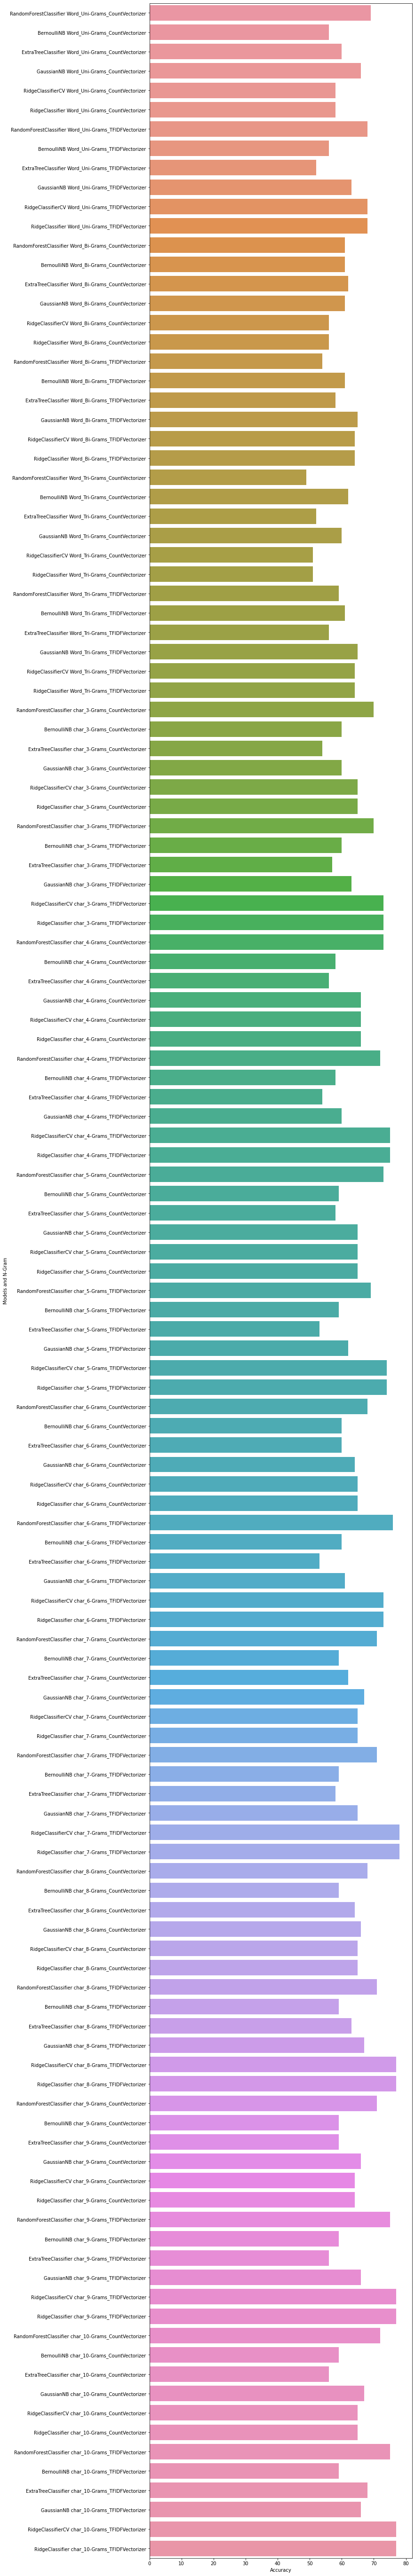

In [51]:
print("\nAccuracy of 6 models on all Feature Vectors:\n")

model_gram = { "Models and N-Gram" : list(prediction['Model Name'] + " "+  prediction['N-Gram Range']),
               "Accuracy" : list(prediction.Accuracy) }

model_gram = pd.DataFrame(model_gram)
#model_gram.set_index("Models and N-Gram", inplace = True)
model_gram = model_gram.convert_dtypes()

# fig = plt.figure(figsize=(10,100))
# bar_plot = sns.barplot(x=model_gram['Accuracy'],
#                        y=model_gram['Models and N-Gram'])

# plt.title("Character N-Gram Range");

plt.figure(figsize=(10, 100))
sns.barplot(x='Accuracy', y='Models and N-Gram', data=model_gram);

In [52]:
# plt.figure(figsize=(80, 50))
# plt.bar(model_gram['Models and N-Gram'], model_gram['Accuracy']);


Accuracy of CountVectorizer Feature Vectors:



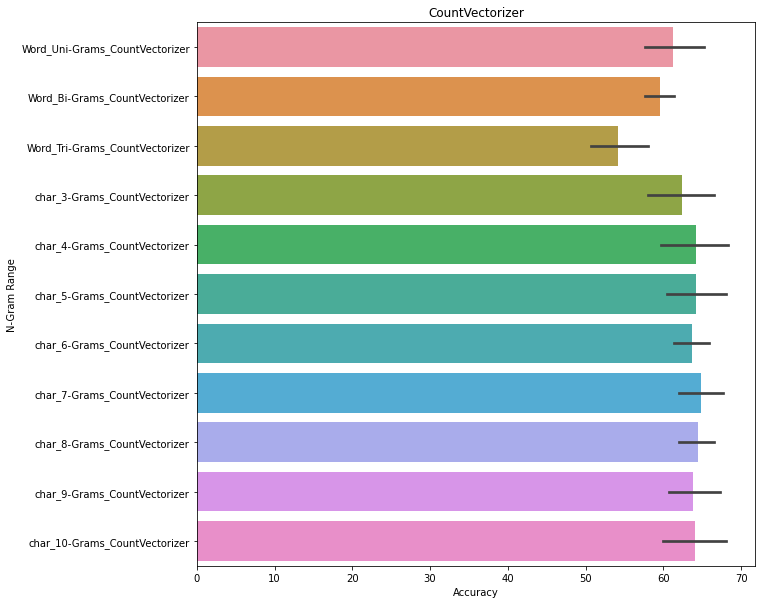

In [53]:
print("\nAccuracy of CountVectorizer Feature Vectors:\n")

fig = plt.figure(figsize=(10,10))
bar_plot = sns.barplot(x=prediction[prediction["N-Gram Range"].str.contains('CountVectorizer')].Accuracy,
                       y=prediction[prediction["N-Gram Range"].str.contains('CountVectorizer')]["N-Gram Range"])

plt.title("CountVectorizer");


Accuracy of TFIDFVectorizer Feature Vectors:



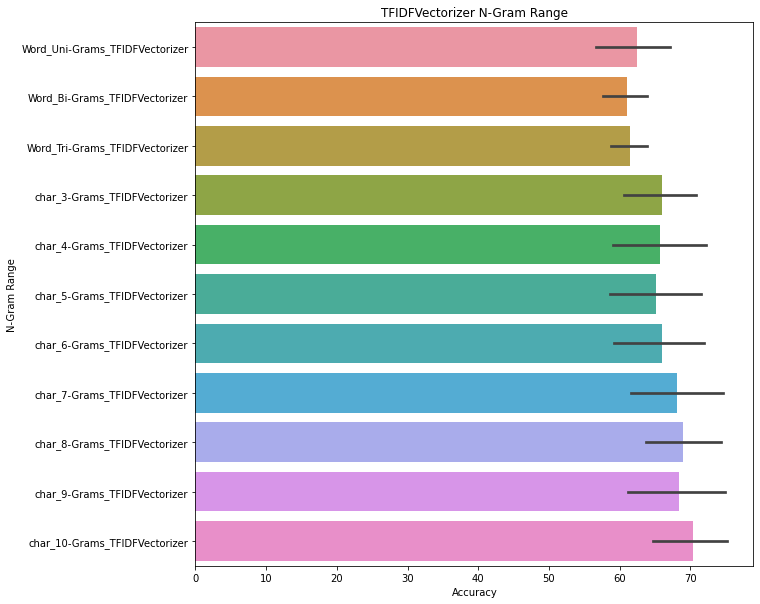

In [54]:
print("\nAccuracy of TFIDFVectorizer Feature Vectors:\n")

fig = plt.figure(figsize=(10,10))
bar_plot = sns.barplot(x=prediction[prediction["N-Gram Range"].str.contains('TFIDFVectorizer')].Accuracy,
                       y=prediction[prediction["N-Gram Range"].str.contains('TFIDFVectorizer')]["N-Gram Range"])

plt.title("TFIDFVectorizer N-Gram Range");


Accuracy on Word base Feature Vectors:



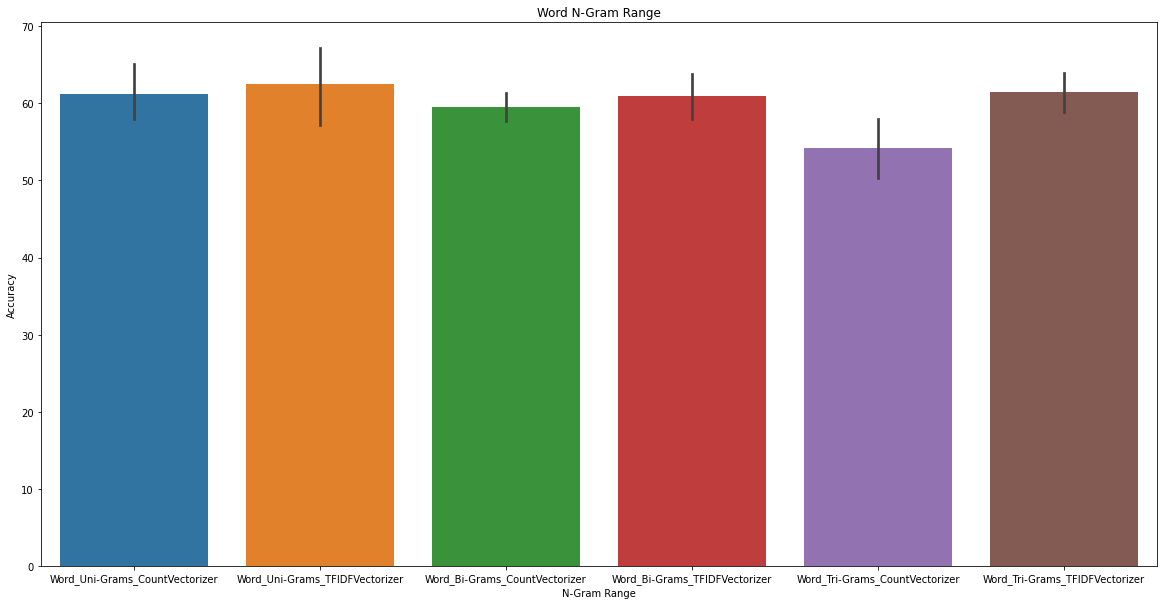

In [55]:
print("\nAccuracy on Word base Feature Vectors:\n")

fig = plt.figure(figsize=(20,10))
bar_plot = sns.barplot(y=prediction[prediction["N-Gram Range"].str.contains('Word')].Accuracy,
                       x=prediction[prediction["N-Gram Range"].str.contains('Word')]["N-Gram Range"])

plt.title("Word N-Gram Range");


Accuracy on Char base Feature Vectors:



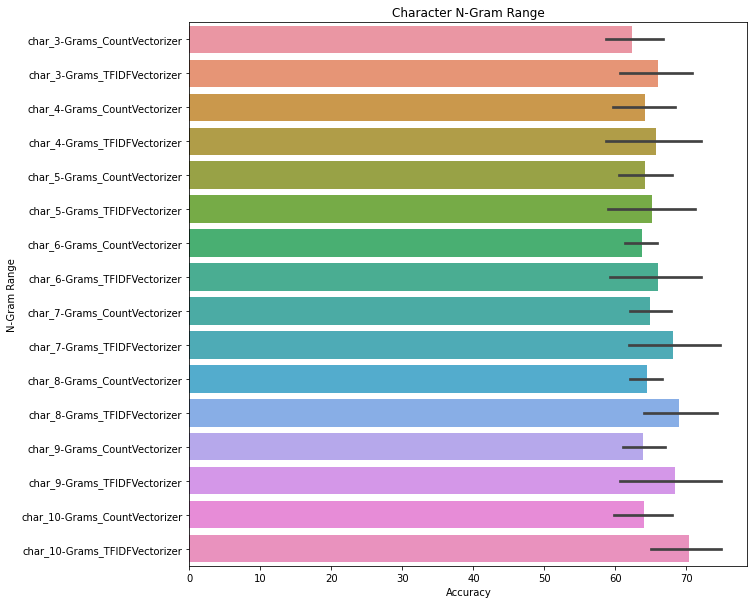

In [56]:
print("\nAccuracy on Char base Feature Vectors:\n")

fig = plt.figure(figsize=(10,10))
bar_plot = sns.barplot(x=prediction[prediction["N-Gram Range"].str.contains('char')].Accuracy,
                       y=prediction[prediction["N-Gram Range"].str.contains('char')]["N-Gram Range"])

plt.title("Character N-Gram Range");


Performance of all 6 Models:



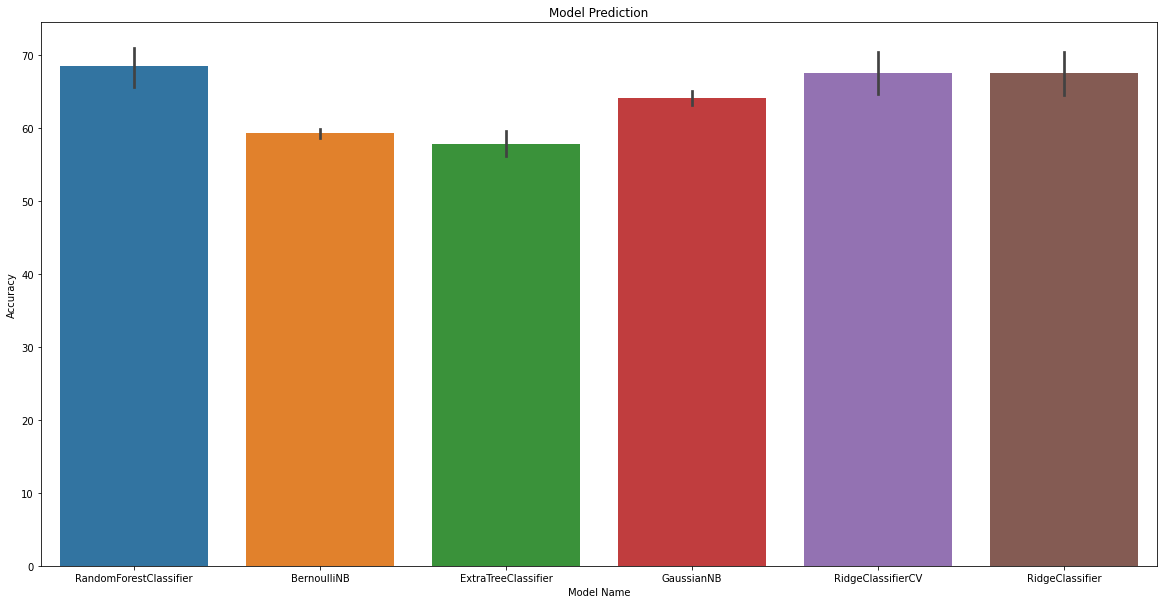

In [57]:
print("\nPerformance of all 6 Models:\n")

fig = plt.figure(figsize=(20,10))
bar_plot = sns.barplot(y=prediction.Accuracy, x=prediction["Model Name"])

# for item in bar_plot.get_xticklabels():
#     item.set_rotation(90)

#plt.xticks(rotation=180, ha='right')
#plt.xticks(rotation='horizontal')
plt.title("Model Prediction");


# <center> <font color="blue"> Best Model </font> </center>

In [58]:
print("\n\t\t\t\tAll Models Predictions\n")
print(tabulate(prediction_table, headers='keys', tablefmt='psql'))
print("\n\n\t\t\t\tBest Model\n")
print(tabulate(prediction[prediction.Accuracy == prediction.Accuracy.max()], headers='keys', tablefmt='psql'))



				All Models Predictions

+-----+------------------------+--------------------------------+------------+---------+
|     | Model Name             | N-Gram Range                   | Accuracy   | Error   |
|-----+------------------------+--------------------------------+------------+---------|
|   1 | RidgeClassifierCV      | char_7-Grams_TFIDFVectorizer   | 78%        | 21%     |
|   2 | RidgeClassifier        | char_7-Grams_TFIDFVectorizer   | 78%        | 21%     |
|   3 | RidgeClassifier        | char_10-Grams_TFIDFVectorizer  | 77%        | 22%     |
|   4 | RidgeClassifierCV      | char_8-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   5 | RidgeClassifierCV      | char_10-Grams_TFIDFVectorizer  | 77%        | 22%     |
|   6 | RidgeClassifier        | char_9-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   7 | RidgeClassifierCV      | char_9-Grams_TFIDFVectorizer   | 77%        | 22%     |
|   8 | RidgeClassifier        | char_8-Grams_TFIDFVectorizer   | 77%        | 22

#  <font color="Red" size=6> Step 8: Application Phase </font>


# <center> <font color="blue"> Combine all data and train best model on all data </font> </center>

In [59]:
print("\nCombine Train Data Input:")
print("\nShape of this feature vactore: ", vectorFeature["char_7-Grams_TFIDFVectorizer"].shape)
feature = pd.DataFrame(vectorFeature["char_7-Grams_TFIDFVectorizer"], columns=tv_char_n7.get_feature_names())
feature


Combine Train Data Input:

Shape of this feature vactore:  (425, 8000)


,ab,abo,ac,acc,acce,acco,act,acti,actu,actua,...,ysi,yst,yste,yti,za,ze,zin,zing,zing,zon
0,0.002710,0.002941,0.022335,0.005317,0.000692,0.004935,0.014877,0.003367,0.011856,0.011856,...,0.000791,0.001975,0.002290,0.000822,0.005215,0.003094,0.003485,0.003824,0.003843,0.002132
1,0.001122,0.000000,0.008598,0.001834,0.000000,0.002188,0.008004,0.001393,0.008433,0.008433,...,0.001636,0.003405,0.001579,0.000851,0.000000,0.001280,0.001202,0.000659,0.000663,0.002941
2,0.003244,0.000978,0.017963,0.007858,0.005066,0.002344,0.002375,0.002687,0.000000,0.000000,...,0.015778,0.005691,0.005583,0.025162,0.000000,0.004938,0.004250,0.004662,0.004685,0.004725
3,0.005291,0.004306,0.018760,0.012111,0.011491,0.001376,0.008133,0.005916,0.002170,0.002170,...,0.021614,0.015421,0.013410,0.000803,0.000000,0.001812,0.002835,0.003110,0.003126,0.002081
4,0.004475,0.003035,0.020906,0.010365,0.009290,0.000728,0.003071,0.001390,0.002294,0.002294,...,0.004081,0.002038,0.002363,0.005093,0.000000,0.006385,0.001798,0.001973,0.001983,0.001467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.029224,0.000000,0.004001,0.000000,0.000000,0.000000,0.004584,0.005186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004474,0.004909,0.004933,0.000000
421,0.008655,0.002515,0.006517,0.002695,0.001580,0.000804,0.003394,0.001536,0.002535,0.002535,...,0.004510,0.000751,0.000870,0.003752,0.001699,0.003529,0.014576,0.013084,0.013149,0.000000
422,0.000000,0.000000,0.007692,0.005833,0.003418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003250,0.000000,0.000000,0.000000,0.006109,0.014338,0.015730,0.015808,0.000000
423,0.003088,0.001197,0.016063,0.005289,0.001691,0.004016,0.009202,0.002192,0.006030,0.006030,...,0.001287,0.000000,0.000000,0.001339,0.001819,0.011581,0.018910,0.020227,0.019806,0.002313


In [60]:
print("\nCombine Train Data Output:\n")
twitterCorpus_le_df['gender']


Combine Train Data Output:



0      1
1      1
2      1
3      1
4      1
      ..
420    0
421    0
422    0
423    0
424    0
Name: gender, Length: 425, dtype: int32

# <center> <font color="blue"> Train best model on all data </font> </center>

In [61]:
    ridcCV = RidgeClassifierCV()
    ridcCV.fit(vectorFeature["char_7-Grams_TFIDFVectorizer"] ,twitterCorpus_le_df['gender']);

#  <font color="Red" size=6> Step 9: Take Input from User </font>

# <center> <font color="blue"> Define a function that will predict the output </font> </center>

In [62]:
def modelPredictionOnUnseenData():
    txt = input("Please Enter Your Input:\n")
    print('\n\n\n=============================================================================================\n\n')

    txt = txt.replace('[^\w\s]','')
    txt = remove_stopwords(txt)
    txt = clean_text(txt)
    print("Input after Preprocessing:\n\n",txt)
    txt = [txt]


    txt = pd.DataFrame(txt, columns=['text'])
    new_data = twitterCorpus_le_df.copy()
    new_data = new_data.append(txt ,ignore_index = True)

    #cinvert userinput into Feature vector
    vectorFeature = tv_char_n7.fit_transform(new_data['text']).todense()
    vectorFeature = vectorFeature[-1]
    print("\n\n\nConvert User input into Feature Vector:\n", vectorFeature)
    predict = ridcCV.predict(vectorFeature)

    #convert model Prediction
    print("\n\n\nPredicted Output Is:")
    predict = leGender.inverse_transform(predict)
    
    #show output in pretty table
    x = PrettyTable()
    x.field_names = ["Model's Prediction"]
    x.add_row([predict])
    print(x)
    print('\n\n\n')

# <center> <font color="green"> Take input from User </font> </center>

Burger King is testing delivery service. Bloomberg says there are four locations in Virgin...
Visa launches digital credit card: Visa's digital wallet is now available on some smartphones.
When doing your taxes this year, you can save time and maybe some mo...

In [63]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Burger King is testing delivery service. Bloomberg says there are four locations in Virgin... Visa launches digital credit card: Visa's digital wallet is now available on some smartphones. When doing your taxes this year, you can save time and maybe some mo...





Input after Preprocessing:

 burger king testing delivery service bloomberg says locations virgin visa launches digital credit card visa digital wallet available smartphones when taxes year save time maybe



Convert User input into Feature Vector:
 [[0. 0. 0. ... 0. 0. 0.]]



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="green"> Take an other unseen data or user input </font> </center>

Don't force us to stage an intervention. Look at your life. Look at your choices.
It's like magic! :) College flashback: I just backed New Studio Album from Toad the Wet Sprocket!
If you're wondering why I'm not tweeting so much this weekend, check my other account: @curtiscchen

In [64]:
modelPredictionOnUnseenData()

Please Enter Your Input:
Don't force us to stage an intervention. Look at your life. Look at your choices. It's like magic! :) College flashback: I just backed New Studio Album from Toad the Wet Sprocket! If you're wondering why I'm not tweeting so much this weekend, check my other account: @curtiscchen





Input after Preprocessing:

  force stage intervention look life look choices like magic  college flashback backed studio album toad sprocket wondering tweeting weekend check account @curtiscchen



Convert User input into Feature Vector:
 [[0.         0.         0.04523116 ... 0.         0.         0.        ]]



Predicted Output Is:
+--------------------+
| Model's Prediction |
+--------------------+
|     ['female']     |
+--------------------+






# <center> <font color="red" size="6"> <----- End -----> </font> </center>